2021210834施博轩
***

In [1]:
import pandas as pd 
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl
import ast
from tqdm.autonotebook import tqdm
import re
from matplotlib import ticker

from matplotlib import  font_manager
my_font = font_manager.FontProperties(fname="/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf")

/var/folders/kd/t2wnd4h911v09vtv543hpkg80000gn/T/ipykernel_2147/2093876471.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
#print(matplotlib.matplotlib_fname())
#print(matplotlib.get_cachedir())

我们观察到csv文件是以字典的形式保存的，我们先写一个自定义函数用来拆解内容以方便之后的使用。

In [3]:
df= pd.read_csv('/Users/improvise/Desktop/ParMet Lab/一面培训/06task/02_企业数据分析/“大师杯”数据集/“大师杯”数据集/融资信息.txt')
df

,id,company,finance_date,finance_round,finance_amount,finance_investor,finance_news_title
0,"{'name': 'id', 'value': '35c7cec0c9294d87b99b0...","{'name': '公司', 'value': '上海浩方在线信息技术有限公司', 'id'...","{'name': '发布日期', 'value': '2012-04-10'}","{'name': '融资轮次', 'value': '被收购'}","{'name': '融资金额', 'value': '31000万元'}","{'name': '投资方', 'value': ['浙数文化']}","{'name': '新闻来源', 'value': None}"
1,"{'name': 'id', 'value': 'd93c51acc0e847d29e52a...","{'name': '公司', 'value': '上海凡济生物科技有限公司', 'id': ...","{'name': '发布日期', 'value': '2017-01-12'}","{'name': '融资轮次', 'value': '天使轮'}","{'name': '融资金额', 'value': '金额未知'}","{'name': '投资方', 'value': ['同领投资']}","{'name': '新闻来源', 'value': None}"
2,"{'name': 'id', 'value': '43d27d4ca08d4ae099ad7...","{'name': '公司', 'value': '上海宏会邦智能设备有限公司', 'id':...","{'name': '发布日期', 'value': '2014-12-29'}","{'name': '融资轮次', 'value': '天使轮'}","{'name': '融资金额', 'value': '金额未知'}","{'name': '投资方', 'value': ['邦明资本']}","{'name': '新闻来源', 'value': None}"
3,"{'name': 'id', 'value': '7aa18d22c3c44fd78bdd0...","{'name': '公司', 'value': '上海伟业创兴机电设备有限公司', 'id'...","{'name': '发布日期', 'value': '2015-04-16'}","{'name': '融资轮次', 'value': None}","{'name': '融资金额', 'value': '金额未知'}","{'name': '投资方', 'value': ['通鼎互联']}","{'name': '新闻来源', 'value': None}"
4,"{'name': 'id', 'value': '190ba9bfad324b5fb9e40...","{'name': '公司', 'value': '上海竞天科技股份有限公司', 'id': ...","{'name': '发布日期', 'value': '2014-11-27'}","{'name': '融资轮次', 'value': '新三板'}","{'name': '融资金额', 'value': '金额未知'}","{'name': '投资方', 'value': ['投资方未知']}","{'name': '新闻来源', 'value': None}"
...,...,...,...,...,...,...,...
9707,"{'name': 'id', 'value': '5688cad888c34d7fb2010...","{'name': '公司', 'value': '上海巨灵信息技术股份有限公司', 'id'...","{'name': '发布日期', 'value': '2013-08-29'}","{'name': '融资轮次', 'value': '新三板'}","{'name': '融资金额', 'value': '金额未知'}","{'name': '投资方', 'value': ['投资方未知']}","{'name': '新闻来源', 'value': None}"
9708,"{'name': 'id', 'value': '3ff5f60780984b7c860a9...","{'name': '公司', 'value': '上海微创电生理医疗科技股份有限公司', '...","{'name': '发布日期', 'value': '2017-08-15'}","{'name': '融资轮次', 'value': '新三板'}","{'name': '融资金额', 'value': '金额未知'}","{'name': '投资方', 'value': ['投资方未知']}","{'name': '新闻来源', 'value': None}"
9709,"{'name': 'id', 'value': '01e5da82ccdd464ebd81d...","{'name': '公司', 'value': '上海亿康医学检验所有限公司', 'id':...","{'name': '发布日期', 'value': '2016-09-01'}","{'name': '融资轮次', 'value': 'B轮'}","{'name': '融资金额', 'value': '15000万'}","{'name': '投资方', 'value': ['通和资本', '新产业创投', '广州...","{'name': '新闻来源', 'value': None}"
9710,"{'name': 'id', 'value': '04d29a03d2b440ceb635c...","{'name': '公司', 'value': '上海裕荣光电科技股份有限公司', 'id'...","{'name': '发布日期', 'value': '2014-08-08'}","{'name': '融资轮次', 'value': '新三板'}","{'name': '融资金额', 'value': '金额未知'}","{'name': '投资方', 'value': ['投资方未知']}","{'name': '新闻来源', 'value': None}"


In [4]:
def ReadDict(file):
    output= pd.read_csv(file)
    for i in tqdm(range(len(output.columns))):
        for j in tqdm(range(len(output)),leave=False):
            output.iloc[j,i] = ast.literal_eval(output.iloc[j,i])['value']
    return output

In [5]:
df_annual_report= ReadDict('/Users/improvise/Desktop/ParMet Lab/一面培训/05深度学习/task/task/02_企业数据分析/“大师杯”数据集/“大师杯”数据集/企业年报.txt',)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/40074 [00:00<?, ?it/s]

  0%|          | 0/40074 [00:00<?, ?it/s]

  0%|          | 0/40074 [00:00<?, ?it/s]

  0%|          | 0/40074 [00:00<?, ?it/s]

In [6]:
df_annual_report.head()

,id,company,year,full_text
0,5ac146dab104483daa2670ad02e38088,上海龙东光电子有限公司,2017,"<div class=""zx-content"">\n<div class=""select-y..."
1,37c19d835ab844fd9071eec50d35c75c,上海龙东光电子有限公司,2018,"<div class=""zx-content"">\n<div class=""select-y..."
2,3336b3215cd74ac19a2579dee51b3c91,赛赫智能设备(上海)股份有限公司,2015,"<div class=""zx-content"">\n<div class=""select-y..."
3,fb34ab908dce4a1dacf0f23a29bddb8b,上海衡峰氟碳材料有限公司,2018,"<div class=""zx-content"">\n<div class=""select-y..."
4,17c4a354b30b4d819fc218532225b68e,上海天龙药业有限公司,2018,"<div class=""zx-content"">\n<div class=""select-y..."


# 找出拥有商标数量最多的前10个企业并进行可视化展示
引入商标档案并分析

In [7]:
#读取数据
df_trademark=ReadDict('/Users/improvise/Desktop/ParMet Lab/一面培训/05深度学习/task/task/02_企业数据分析/“大师杯”数据集/“大师杯”数据集/商标信息.txt')
df_trademark

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/215222 [00:00<?, ?it/s]

  0%|          | 0/215222 [00:00<?, ?it/s]

  0%|          | 0/215222 [00:00<?, ?it/s]

  0%|          | 0/215222 [00:00<?, ?it/s]

  0%|          | 0/215222 [00:00<?, ?it/s]

  0%|          | 0/215222 [00:00<?, ?it/s]

  0%|          | 0/215222 [00:00<?, ?it/s]

  0%|          | 0/215222 [00:00<?, ?it/s]

  0%|          | 0/215222 [00:00<?, ?it/s]

,id,company,mark_name,mark_type,mark_reg_no,mark_style,mark_status,mark_apply_time,mark_valid_time
0,a63458739be44f7bac688f4d7eca3ebb,上海祥贸实业有限公司,图形,第37类-建筑修理,18137471,None,None,None,None
1,b1ec8762c9224f09935b7ae04f15712d,上海祥贸实业有限公司,祥贸,第37类-建筑修理,18137472,None,None,None,None
2,5510a6cc34d2478ba44077a693610d3b,上海康达化工新材料股份有限公司,魔带,第35类-广告销售,24240690,None,None,None,None
3,db59c983a5b2488086c92640fffd15d0,上海康达化工新材料股份有限公司,魔带,第01类-化学原料,24240441,None,None,None,None
4,711f7fe35bda48359550d31da64c004c,上海康达化工新材料股份有限公司,康达新材,第35类-广告销售,22306678,None,None,None,None
...,...,...,...,...,...,...,...,...,...
215217,749a2c3c50524ecdbd7f43c0d065d292,上海百事通信息技术股份有限公司,法宝网,第45类-社会服务,30682274,https://zhengxin-pub.bj.bcebos.com/mark/b68cc8...,商标注册申请,2018-05-04,2019-04-28 至 2029-04-27
215218,72cd652ef00447a28a7867912b5344d1,上海雄风自控工程有限公司,KISTLER-MORSE,第09类-科学仪器,6962896,https://zhengxin-pub.bj.bcebos.com/mark/297e99...,商标注册申请,2008-09-22,2010-09-21 至 2020-09-20
215219,2de122afc2f6484a9857a151925c09d2,上海商米科技有限公司,SUNMIBIOT SUNMI BIOT,第42类-网站服务,37678353,https://zhengxin-pub.bj.bcebos.com/mark/fff064...,变更商标申请人注册人名义地址,2019-04-22,- 至 -
215220,b839e515264f49de943ea74005cd1487,上海商米科技有限公司,SUNMIBLOT SUNMI BLOT,第09类-科学仪器,37682504,https://zhengxin-pub.bj.bcebos.com/mark/50b7e2...,变更商标申请人注册人名义地址,2019-04-22,- 至 -


In [8]:
#统计公司出现数量并降序排列
dataTemp=df_trademark.company.value_counts(sort=True,ascending=False)
dataTemp

伽蓝(集团)股份有限公司      5159
盛趣信息技术(上海)有限公司    4697
上海阅文信息技术有限公司      3042
上海蔚来汽车有限公司        2719
上海玄霆娱乐信息科技有限公司    2592
                  ... 
上海飞机制造有限公司           1
上海二十冶建设有限公司          1
上海小申教育科技有限公司         1
上海芯泽电子科技有限公司         1
上海成生科技有限公司           1
Name: company, Length: 6362, dtype: int64

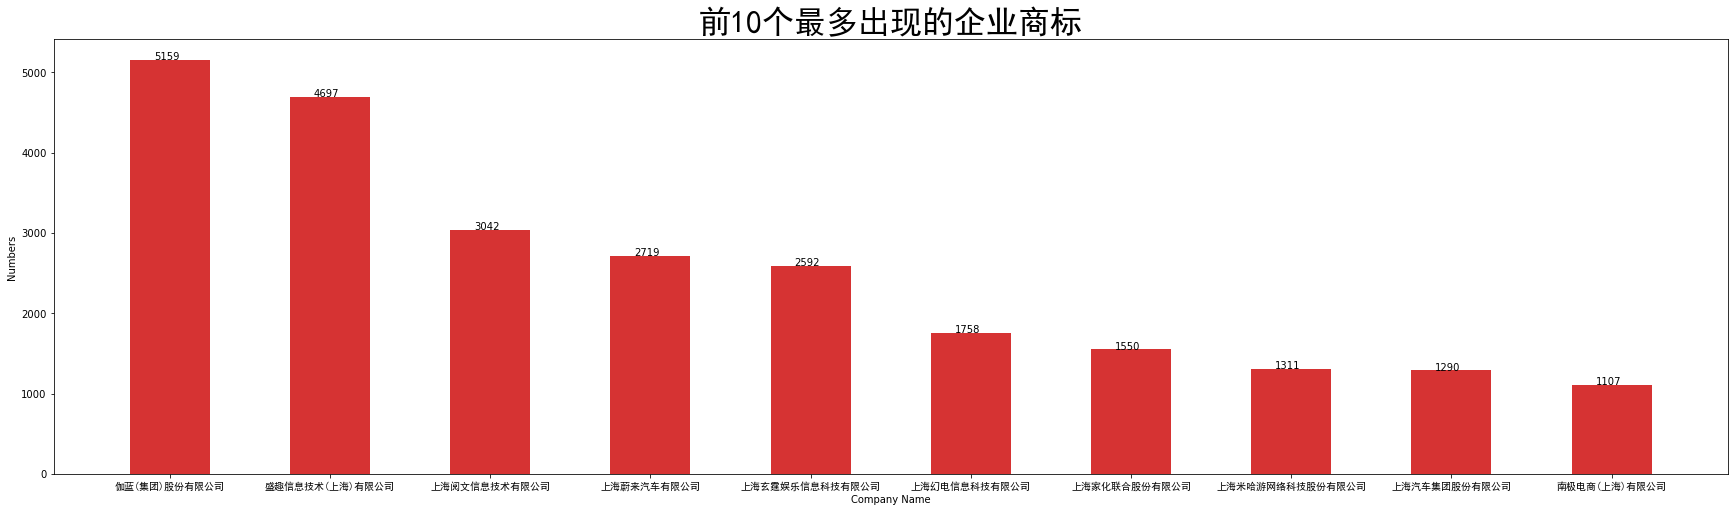

In [9]:
#绘制商标数量拥有数量企业前10名
plt.figure(figsize=(30,8))

x=np.arange(10)
data = dataTemp.head(10)
data_index = dataTemp.head(10).index

plt.title('前10个最多出现的企业商标',fontproperties=my_font,fontsize=32)
plt.xlabel('Company Name')
plt.ylabel('Numbers')
plt.xticks(range(len(data_index)),data_index,fontproperties=my_font)
for i in range(len(data)):
    plt.text(x= i-0.1, y=data[i] +1, s='%d'%data[i])
plt.bar(x,data,width=0.5,color='#CC0000',alpha=0.8)

plt.show()

# 找出上海企业商标（国际分类中）包括哪些分类，并对数量占前10的类别进行可视化展示

In [10]:
#统计企业商标的类别出现数量并降序排列
dataTemp=df_trademark.mark_type.value_counts(sort=True,ascending=False)
#dataTemp

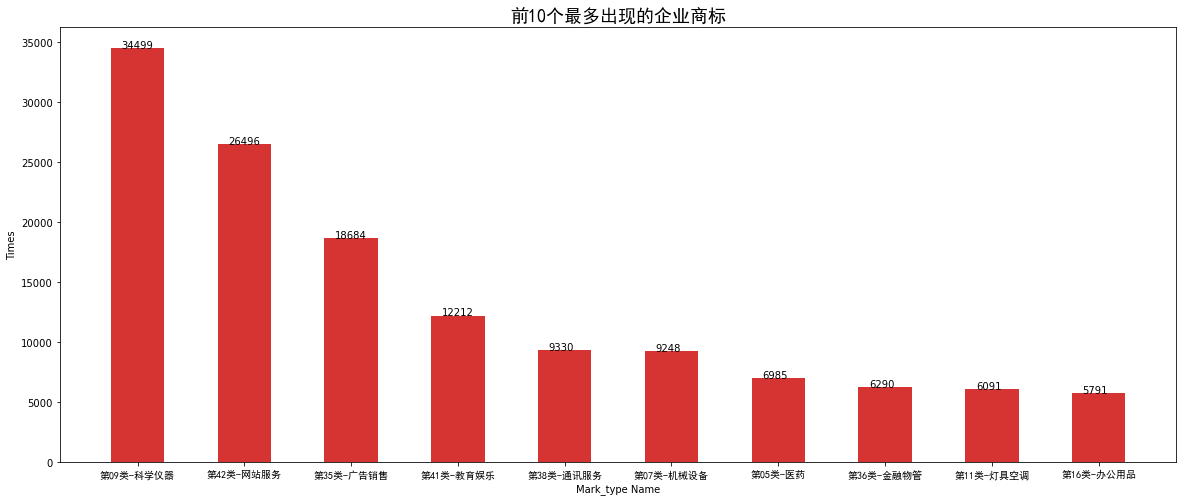

In [11]:
#绘制企业商标的类别前10名
plt.figure(figsize=(20,8))

x=np.arange(10)
data = dataTemp.head(10)
data_index = dataTemp.head(10).index

plt.title('前10个最多出现的企业商标',fontproperties=my_font,fontsize=18)
plt.xlabel('Mark_type Name')
plt.ylabel('Times')
plt.xticks(range(len(data_index)),data_index,fontproperties=my_font)
for i in range(len(data)):
    plt.text(x= i-0.15, y=data[i] +1, s='%d'%data[i])
plt.bar(x,data,width=0.5,color='#CC0000',alpha=0.8)

plt.show()

# 找出拥有商标数量最多的前10个企业并进行可视化展示（具体到包含了哪些类型的商标）

In [12]:
#获取前10个有最多商标数量的企业名称
companies=list(df_trademark.company.value_counts(sort=True,ascending=False).index)
companies=pd.DataFrame([companies[0:10],pd.DataFrame(np.arange(10)).T],index=['company','x_label']).T
companies

,company,x_label
0,伽蓝(集团)股份有限公司,0
1,盛趣信息技术(上海)有限公司,1
2,上海阅文信息技术有限公司,2
3,上海蔚来汽车有限公司,3
4,上海玄霆娱乐信息科技有限公司,4
5,上海幻电信息科技有限公司,5
6,上海家化联合股份有限公司,6
7,上海米哈游网络科技股份有限公司,7
8,上海汽车集团股份有限公司,8
9,南极电商(上海)有限公司,9


In [13]:
#统计每个企业拥有商标类型
company_result=pd.DataFrame(columns=['company','mark_type','position_x'])
iter=0

for (companyN, mark_type), dataTemp in tqdm(df_trademark.groupby(['company','mark_type'])):
    for i in companies.company:
        if companyN == i:
            company_result=pd.concat([company_result,pd.DataFrame([companyN, mark_type, int(companies.loc[companies.company==companyN,'x_label'])],
                                                              index=['company','mark_type','position_x'],
                                                              columns=[iter]).T])
        iter +=1
company_result=company_result.reset_index()
company_result.pop('index')
company_result

  0%|          | 0/31599 [00:00<?, ?it/s]

,company,mark_type,position_x
0,上海家化联合股份有限公司,第01类-化学原料,6
1,上海家化联合股份有限公司,第02类-颜料油漆,6
2,上海家化联合股份有限公司,第03类-日化用品,6
3,上海家化联合股份有限公司,第04类-燃料油脂,6
4,上海家化联合股份有限公司,第05类-医药,6
...,...,...,...
409,盛趣信息技术(上海)有限公司,第41类-教育娱乐,1
410,盛趣信息技术(上海)有限公司,第42类-网站服务,1
411,盛趣信息技术(上海)有限公司,第43类-餐饮住宿,1
412,盛趣信息技术(上海)有限公司,第44类-医疗园艺,1


In [14]:
#看看每个公司的每一类商标类型是不是只有一个
False in (company_result.value_counts().reset_index()[0]==np.ones(414,int))
#是的

False

In [15]:
for i in tqdm(range(len(company_result))):
    company_result.loc[company_result.index==i,'position_y'] = re.findall("\d+",company_result.iloc[i,1])
    company_result.loc[company_result.index==i,'position_y'] = int(company_result.loc[company_result.index==i,'position_y'])
    
company_result

  0%|          | 0/414 [00:00<?, ?it/s]

,company,mark_type,position_x,position_y
0,上海家化联合股份有限公司,第01类-化学原料,6,1
1,上海家化联合股份有限公司,第02类-颜料油漆,6,2
2,上海家化联合股份有限公司,第03类-日化用品,6,3
3,上海家化联合股份有限公司,第04类-燃料油脂,6,4
4,上海家化联合股份有限公司,第05类-医药,6,5
...,...,...,...,...
409,盛趣信息技术(上海)有限公司,第41类-教育娱乐,1,41
410,盛趣信息技术(上海)有限公司,第42类-网站服务,1,42
411,盛趣信息技术(上海)有限公司,第43类-餐饮住宿,1,43
412,盛趣信息技术(上海)有限公司,第44类-医疗园艺,1,44


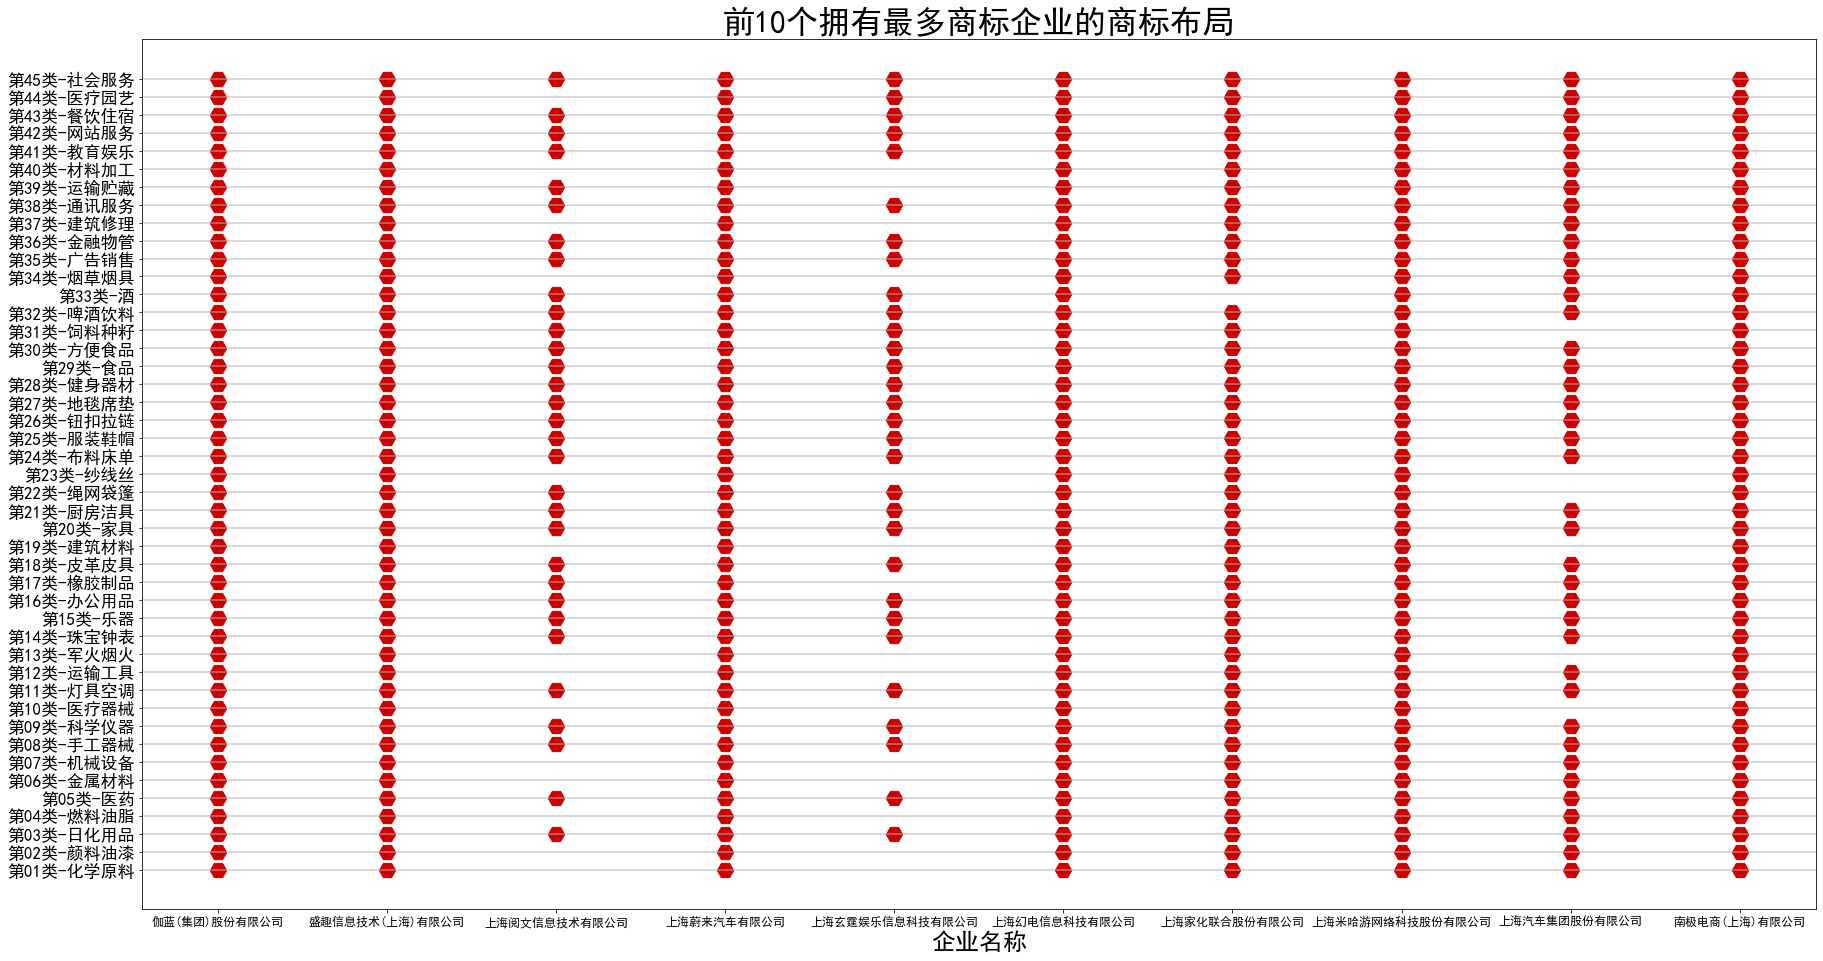

In [16]:
#绘制散点图
plt.figure(figsize=(30,16))
x= company_result.position_x
y= company_result.position_y-1

plt.title('前10个拥有最多商标企业的商标布局',fontproperties=my_font,fontsize=32)
plt.xlabel('企业名称',fontproperties=my_font,fontsize=24)
plt.xticks(range(len(companies.company)),companies.company,fontproperties=my_font,fontsize=12)
plt.yticks(range(len(company_result.mark_type.drop_duplicates())),
           company_result.mark_type.drop_duplicates().sort_values(),fontproperties=my_font,fontsize=17)
plt.scatter(x,y,c='#CC0000',marker='H',s=270)
plt.grid(axis='y',color='#B4B4B4',alpha=0.5,linewidth=2)
plt.show()

# 找出获取融资最多的企业并对其融资来源（各比例）进行分析并可视化展示

In [17]:
#读取数据
df_financing=ReadDict('/Users/improvise/Desktop/ParMet Lab/一面培训/05深度学习/task/task/02_企业数据分析/“大师杯”数据集/“大师杯”数据集/融资信息.txt')
df_financing

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/9712 [00:00<?, ?it/s]

  0%|          | 0/9712 [00:00<?, ?it/s]

  0%|          | 0/9712 [00:00<?, ?it/s]

  0%|          | 0/9712 [00:00<?, ?it/s]

  0%|          | 0/9712 [00:00<?, ?it/s]

  0%|          | 0/9712 [00:00<?, ?it/s]

  0%|          | 0/9712 [00:00<?, ?it/s]

,id,company,finance_date,finance_round,finance_amount,finance_investor,finance_news_title
0,35c7cec0c9294d87b99b0794dd69944f,上海浩方在线信息技术有限公司,2012-04-10,被收购,31000万元,[浙数文化],None
1,d93c51acc0e847d29e52ad04d6ddbd6f,上海凡济生物科技有限公司,2017-01-12,天使轮,金额未知,[同领投资],None
2,43d27d4ca08d4ae099ad7d271080a665,上海宏会邦智能设备有限公司,2014-12-29,天使轮,金额未知,[邦明资本],None
3,7aa18d22c3c44fd78bdd085c06cdff64,上海伟业创兴机电设备有限公司,2015-04-16,None,金额未知,[通鼎互联],None
4,190ba9bfad324b5fb9e403c50d8f32ec,上海竞天科技股份有限公司,2014-11-27,新三板,金额未知,[投资方未知],None
...,...,...,...,...,...,...,...
9707,5688cad888c34d7fb2010397c448dbc4,上海巨灵信息技术股份有限公司,2013-08-29,新三板,金额未知,[投资方未知],None
9708,3ff5f60780984b7c860a9811e6391aa8,上海微创电生理医疗科技股份有限公司,2017-08-15,新三板,金额未知,[投资方未知],None
9709,01e5da82ccdd464ebd81d0a2c2cf1cf1,上海亿康医学检验所有限公司,2016-09-01,B轮,15000万,"[通和资本, 新产业创投, 广州越秀产业基金]",None
9710,04d29a03d2b440ceb635c8c6b870128e,上海裕荣光电科技股份有限公司,2014-08-08,新三板,金额未知,[投资方未知],None


我们看到前五后五行里就有8行是未知金额的融资

那没办法了，我们只能统计已知融资金额的企业中，谁有最多的融资
***
Justification:

为什么我们考虑`部分公开部分隐藏`融资大小的企业呢？一来我们万一忽略了一个大佬，尽管有一轮没公开，但是其他的几轮却吊打其他企业，岂不是自作聪明；二来要是隐藏过多融资数量的企业也不会影响这样筛选机制下的赢家。
***


In [18]:
for amount in tqdm(df_financing.finance_amount.drop_duplicates().values):
    if amount.isalpha():
        print(amount)
     

  0%|          | 0/1530 [00:00<?, ?it/s]

金额未知
未披露未包括的交易货币
数百万美元美元
超亿元人民币元
数千万人民币元
千万级人民币元
数千万美元美元
数百万人民币元
近亿人民币元
数亿人民币元
数千万元
千万级美元未包括的交易货币
亿元及以上元
亿元及以上
数千万
千万级
None


那显然我们不能把这样的全都扔掉，基于**保守性**原则，我们有些能处理的还是保守处理

特别地，对于没有说明货币单位的，毕竟你用中文写的，我们先统一考虑人民币单位。

In [19]:
#梳理数据finance_amount
for i in tqdm(range(len(df_financing))):
    if df_financing.iloc[i,4]=='数百万美元美元':
        df_financing.iloc[i,4]= '100万美元'
    elif ((df_financing.iloc[i,4]=='超亿元人民币元')|(df_financing.iloc[i,4]== '亿元及以上元')|(df_financing.iloc[i,4]== '亿元及以上')):
        df_financing.iloc[i,4]= '10000万人民币元'
    elif ((df_financing.iloc[i,4]== '数千万人民币元')|(df_financing.iloc[i,4]== '千万级人民币元')|(df_financing.iloc[i,4]== '数千万元')|(df_financing.iloc[i,4]== '数千万')|(df_financing.iloc[i,4]== '千万级')):
        df_financing.iloc[i,4]= '1000万人民币元'
    elif ((df_financing.iloc[i,4]== '数千万美元美元')|(df_financing.iloc[i,4]== '千万级美元未包括的交易货币')):
        df_financing.iloc[i,4]= '1000万美元'
    elif df_financing.iloc[i,4]== '数百万人民币元':
        df_financing.iloc[i,4]= '100万人民币元'
    elif df_financing.iloc[i,4]== '近亿人民币元':
        df_financing.iloc[i,4]= '9000万人民币元'
    elif df_financing.iloc[i,4]== '数亿人民币元':
        df_financing.iloc[i,4]= '10000万人民币元'


  0%|          | 0/9712 [00:00<?, ?it/s]

In [20]:
#移除金额未知的企业
for i in tqdm(range(len(df_financing))):
    if ((df_financing.loc[df_financing.index==i,'finance_amount'] == '金额未知')|(df_financing.loc[df_financing.index==i,'finance_amount'] == '未披露未包括的交易货币')|(df_financing.loc[df_financing.index==i,'finance_amount'] == 'None')).any():
        df_financing=df_financing.drop(i)
        
df_financing=df_financing.reset_index()
df_financing.pop('index')
df_financing

  0%|          | 0/9712 [00:00<?, ?it/s]

,id,company,finance_date,finance_round,finance_amount,finance_investor,finance_news_title
0,35c7cec0c9294d87b99b0794dd69944f,上海浩方在线信息技术有限公司,2012-04-10,被收购,31000万元,[浙数文化],None
1,437ed95ec97b4701afafacc7401e1239,上海房品汇网络信息技术有限公司,2015-03-03,天使轮,100万元,[华映资本],None
2,88b21413ca18440abd9dde9f3f480ec2,上海红生系统工程有限公司,2018-05-10,被收购,49000万元,[泰豪集团],泰豪科技：拟4.9亿元收购上海红生100%股权
3,d16dd2529d9b45239fef765232856938,上海鸿翼软件技术股份有限公司,2018-06-04,新三板定增,2540万元,[安赐资本],None
4,655c033a78004c77aa1f27d1fb427c31,上海鸿翼软件技术股份有限公司,2016-05-03,新三板定增,250万元,[投资方未知],None
...,...,...,...,...,...,...,...
4258,aa152ecf71f64c60bad819e8b087c459,普研(上海)标准技术服务股份有限公司,2018-05-17,新三板定增,3003万,[在册股东;员工],None
4259,fe0fb9fa195f469f902141d134dccccc,上海正昀新能源技术有限公司,2016-09-08,被收购,60000万,[露笑科技],None
4260,8269338e9b1f4f73b877ad0d59720ba2,上海派拉软件股份有限公司,2019-03-21,B轮,6000万,"[东方富海, 涌铧投资]",身份认证安全管理企业“派拉软件”获6000万B轮投资 东方富海领投 | 上海派拉软件
4261,01f26a17d96b4443bd9a73f1cf99577a,上海即信信息科技有限公司,2015-08-04,天使轮,100万,[陶石资本],None


我们发现金额的记录方式和金额的单位都有所不同，先查看有哪些说法

In [21]:
amount_name={}

for amount in tqdm(df_financing.finance_amount.drop_duplicates().values):
    amount_name[str(re.findall(u"[\u4e00-\u9fa5]+",amount))]=0
    
amount_name

  0%|          | 0/1516 [00:00<?, ?it/s]

{"['万元']": 0,
 "['万人民币元']": 0,
 "['万美元']": 0,
 "['万美元美元']": 0,
 "['近', '亿人民币元']": 0,
 "['亿人民币元']": 0,
 "['万香港元']": 0,
 "['超', '亿人民币元']": 0,
 "['亿美元未包括的交易货币']": 0,
 "['元']": 0,
 "['万欧元']": 0,
 "['万']": 0,
 '[]': 0}

下面我们的任务就是统一计量单位，一律用人民币元来统计。
>8月15日的汇率如下：
1美元=6.7684人民币 ;
1港元=0.8612人民币 ;
1欧元=6.9206人民币

In [22]:
p0 = re.compile(u'(\d{1,10})([\u4e00-\u9fa5]?(?:元))')#人民币元
p1 = re.compile(u'(\d{1,10})([\u4e00-\u9fa5]?(?:万元|万人民币元|万))')#万人民币元
p2 = re.compile(u'(\d{1,10})([\u4e00-\u9fa5]?(?:亿人民币元))')       #亿人民币元
p3 = re.compile(u'(\d{1,10})([\u4e00-\u9fa5]?(?:万美元|万美元美元))') #万美元
p4 = re.compile(u'(\d{1,10})([\u4e00-\u9fa5]?(?:亿美元未包括的交易货币))') #亿美元
p5 = re.compile(u'(\d{1,10})([\u4e00-\u9fa5]?(?:万欧元))')#万欧元
p6 = re.compile(u'(\d{1,10})([\u4e00-\u9fa5]?(?:万香港元))')#万香港元

In [23]:
#复制一份（纯纯因为我菜所以要复制一份这样可以随便捣鼓）
norm_df_financing=df_financing.loc[:,:]
norm_df_financing

,id,company,finance_date,finance_round,finance_amount,finance_investor,finance_news_title
0,35c7cec0c9294d87b99b0794dd69944f,上海浩方在线信息技术有限公司,2012-04-10,被收购,31000万元,[浙数文化],None
1,437ed95ec97b4701afafacc7401e1239,上海房品汇网络信息技术有限公司,2015-03-03,天使轮,100万元,[华映资本],None
2,88b21413ca18440abd9dde9f3f480ec2,上海红生系统工程有限公司,2018-05-10,被收购,49000万元,[泰豪集团],泰豪科技：拟4.9亿元收购上海红生100%股权
3,d16dd2529d9b45239fef765232856938,上海鸿翼软件技术股份有限公司,2018-06-04,新三板定增,2540万元,[安赐资本],None
4,655c033a78004c77aa1f27d1fb427c31,上海鸿翼软件技术股份有限公司,2016-05-03,新三板定增,250万元,[投资方未知],None
...,...,...,...,...,...,...,...
4258,aa152ecf71f64c60bad819e8b087c459,普研(上海)标准技术服务股份有限公司,2018-05-17,新三板定增,3003万,[在册股东;员工],None
4259,fe0fb9fa195f469f902141d134dccccc,上海正昀新能源技术有限公司,2016-09-08,被收购,60000万,[露笑科技],None
4260,8269338e9b1f4f73b877ad0d59720ba2,上海派拉软件股份有限公司,2019-03-21,B轮,6000万,"[东方富海, 涌铧投资]",身份认证安全管理企业“派拉软件”获6000万B轮投资 东方富海领投 | 上海派拉软件
4261,01f26a17d96b4443bd9a73f1cf99577a,上海即信信息科技有限公司,2015-08-04,天使轮,100万,[陶石资本],None


In [24]:
#亿美元
for i in tqdm(range(len(norm_df_financing['finance_amount']))):
    try:
        if re.findall(p4,norm_df_financing['finance_amount'][i]) !=[]:#
            [(number,unit)]=re.findall(p4,norm_df_financing['finance_amount'][i])
            norm_df_financing['finance_amount'][i]= int(int(number)*100000000*6.7684)
            #print(i)
    except TypeError:
        pass

  0%|          | 0/4263 [00:00<?, ?it/s]

In [25]:
#万美元
for i in tqdm(range(len(norm_df_financing['finance_amount']))):
    try:
        if re.findall(p3,norm_df_financing['finance_amount'][i]) !=[]:#
            [(number,unit)]=re.findall(p3,norm_df_financing['finance_amount'][i])
            norm_df_financing['finance_amount'][i]= int(int(number)*10000*6.7684)
            #print(i)
    except TypeError:
        pass

  0%|          | 0/4263 [00:00<?, ?it/s]

In [26]:
#万欧元
for i in tqdm(range(len(norm_df_financing['finance_amount']))):
    try:
        if re.findall(p5,norm_df_financing['finance_amount'][i]) !=[]:#
            [(number,unit)]=re.findall(p5,norm_df_financing['finance_amount'][i])
            norm_df_financing['finance_amount'][i]= int(int(number)*10000*6.9206)
            #print(i)
    except TypeError:
        pass

  0%|          | 0/4263 [00:00<?, ?it/s]

In [27]:
#万香港币
for i in tqdm(range(len(norm_df_financing['finance_amount']))):
    try:
        if re.findall(p6,norm_df_financing['finance_amount'][i]) !=[]:#
            [(number,unit)]=re.findall(p6,norm_df_financing['finance_amount'][i])
            norm_df_financing['finance_amount'][i]= int(int(number)*10000*0.8612)
            #print(i)
    except TypeError:
        pass

  0%|          | 0/4263 [00:00<?, ?it/s]

In [28]:
#亿元
for i in tqdm(range(len(norm_df_financing['finance_amount']))):
    try:
        if re.findall(p2,norm_df_financing['finance_amount'][i]) !=[]:#
            [(number,unit)]=re.findall(p2,norm_df_financing['finance_amount'][i])
            norm_df_financing['finance_amount'][i]= int(int(number)*100000000)
            #print(i)
    except TypeError:
        pass

  0%|          | 0/4263 [00:00<?, ?it/s]

In [29]:
#万元
for i in tqdm(range(len(norm_df_financing['finance_amount']))):
    try:
        if re.findall(p1,norm_df_financing['finance_amount'][i]) !=[]:#
            [(number,unit)]=re.findall(p1,norm_df_financing['finance_amount'][i])
            norm_df_financing['finance_amount'][i]= int(int(number)*10000)
            #print(i)
    except TypeError:
        pass

  0%|          | 0/4263 [00:00<?, ?it/s]

In [30]:
#元
for i in tqdm(range(len(norm_df_financing['finance_amount']))):
    try:
        if re.findall(p0,norm_df_financing['finance_amount'][i]) !=[]:#
            [(number,unit)]=re.findall(p0,norm_df_financing['finance_amount'][i])
            norm_df_financing['finance_amount'][i]= int(number)
            #print(i)
    except TypeError:
        pass

  0%|          | 0/4263 [00:00<?, ?it/s]

至此，我们梳理完了全部的融资金额。

In [31]:
#检查一下
for amount in norm_df_financing['finance_amount']:
    if type(amount)== str:
        print(amount)

86271.5


In [32]:
#对异常值做修正
for i in range(len(norm_df_financing['finance_amount'])):
    if type(norm_df_financing['finance_amount'][i])==str:
        norm_df_financing['finance_amount'][i]=float(norm_df_financing['finance_amount'][i])
        print('Rectified.')
        

Rectified.


In [33]:
df_financingB = norm_df_financing.groupby('company')['finance_amount'].sum()

In [34]:
df_financingB.sort_values(ascending=False).head(30)

company
拉扎斯网络科技(上海)有限公司       82824910800
中芯国际集成电路制造(上海)有限公司    76801621200
腾讯科技(上海)有限公司          56567892320
马瑞利(中国)有限公司           47725080000
上海蔚来汽车有限公司            24179798000
上海药明康德新药开发有限公司        23477512644
安波福电气系统有限公司           22335720000
德尔福(上海)动力推进系统有限公司     22335720000
上海康恒环境股份有限公司          19998800000
上海悦易网络信息技术有限公司        15180631200
网宿科技股份有限公司            14945120000
展讯通信(上海)有限公司          14285203800
上海韦尔半导体股份有限公司         14156090000
上海莱士血液制品股份有限公司        13758640000
上海鸿洋电子商务股份有限公司        13248000000
上海微盟企业发展有限公司          12531330920
完美世界游戏有限责任公司          12000000000
上海幻电信息科技有限公司          11689422812
上海阅文信息技术有限公司          10098920000
东方财富信息股份有限公司           9910910000
上海聚力传媒技术有限公司           9359612400
上海普适导航科技股份有限公司         8658480000
上海现代制药股份有限公司           8340070000
上海汉涛信息咨询有限公司           8286904400
易居企业(中国)集团有限公司         8252560800
上海和辉光电有限公司             8171700000
锐迪科微电子(上海)有限公司         7647989800
携程计算机技术(上海)有限公司        6878521868
上海申龙客车有限公司             6800000000
上海联影医疗

还是较有说服力的数据，拉扎斯运营着饿了吗平台，腾讯、蔚来汽车、药明康德我们也都不陌生。（而且这个billion的数量级也符合这些公司的体量）
***
接下来我们就着重分析一下拉扎斯

In [35]:
df_elm=norm_df_financing.loc[norm_df_financing.company=='拉扎斯网络科技(上海)有限公司']
df_elm

,id,company,finance_date,finance_round,finance_amount,finance_investor,finance_news_title
42,f3364aa6934047e0943a8ca2dd5f54fa,拉扎斯网络科技(上海)有限公司,2018-04-02,被收购,64299800000,[阿里巴巴],传阿里巴巴今日完成饿了么全资收购
43,c725f155c7e14ce381bdf95bcb03f625,拉扎斯网络科技(上海)有限公司,2017-06-22,后期阶段,2707360000,"[阿里巴巴, 蚂蚁金服]",阿里联手蚂蚁金服4亿美元增持饿了么 共持股32.9%
44,22a698ed9d3a49418d91bd0dbd5d30fa,拉扎斯网络科技(上海)有限公司,2015-12-25,Pre-IPO,8460500000,"[阿里巴巴, 蚂蚁金服]",【独家】阿里12.5亿美元投饿了么成第一大股东
45,d43a442d2af74f9eac7f5134b6767374,拉扎斯网络科技(上海)有限公司,2015-08-27,F轮,4264092000,"[华联股份, 中信产业基金, CMC资本, 腾讯投资, 京东, 红杉中国, 歌斐资产]",饿了么获6.3亿美元F轮融资，在外卖O2O之路上“舍命狂奔”
46,3663ff9cdb7a45ffb0fe4aa6bfe6cce7,拉扎斯网络科技(上海)有限公司,2015-01-23,E轮,2368940000,"[中信产业基金, 腾讯投资, 大众点评网, 红杉中国, 阿里巴巴, 京东数科, 蚂蚁金服]",None
47,a2e97bce8ee54c1fbec1efed41d9e4cb,拉扎斯网络科技(上海)有限公司,2014-05-01,D轮,541472000,[大众点评网],None
48,26dca44d9fc04ee09a72db201c1607f6,拉扎斯网络科技(上海)有限公司,2013-11-01,C轮,169210000,"[红杉中国, 经纬中国, 金沙江创投]",None
49,e010483be1334dca923cfb7ebfb43ae4,拉扎斯网络科技(上海)有限公司,2013-01-01,B轮,6768400,"[经纬中国, 金沙江创投]",None
50,b3988dd210d84bd7be271eda860b56b9,拉扎斯网络科技(上海)有限公司,2011-03-01,A轮,6768400,[金沙江创投],None


怎么分析融资来源呢，我们就要看每个round的资金份额和资本参与度

In [36]:
#每个round的资金份额和资本参与度
df_elm['finance_proportion']=df_elm['finance_amount']/df_financingB.sort_values(ascending=False)[0]

/var/folders/kd/t2wnd4h911v09vtv543hpkg80000gn/T/ipykernel_7530/3273558315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_elm['finance_proportion']=df_elm['finance_amount']/df_financingB.sort_values(ascending=False)[0]


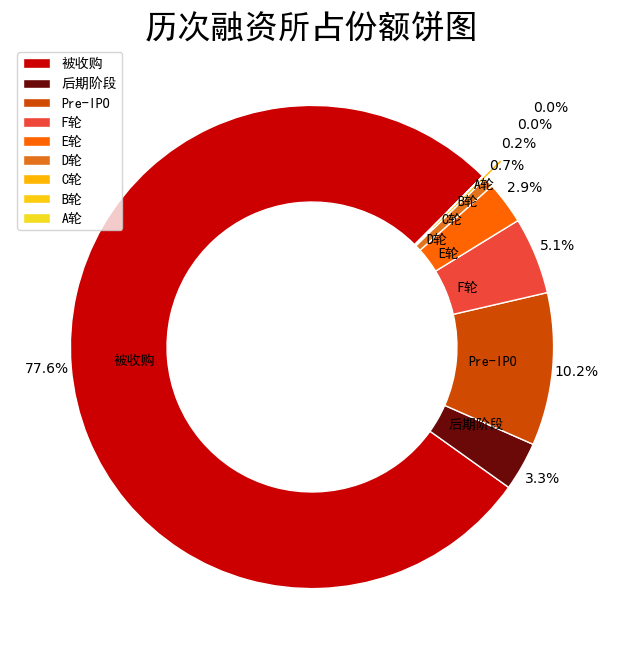

In [37]:
plt.figure(figsize=(10,8),dpi=100)
label = df_elm['finance_round']
data = df_elm['finance_proportion']
explode = [0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.3]

colors = ['#CC0000','#6B0808','#D04A02','#EF483A','#FF6400','#E3721C','#FFB600','#FECC0F','#F2DD21']
p=plt.pie(data,labels=label,autopct='%3.1f%%',explode=explode,startangle=45,
          colors=colors,pctdistance=1.1,labeldistance=0.65,
         wedgeprops=dict(width=0.4,edgecolor='w'))
for font in p[1]:
    font.set_fontproperties(my_font)
plt.title('历次融资所占份额饼图',fontproperties=my_font,fontsize=24)
plt.legend(label,prop=my_font)
plt.show()

****
# 根据已有数据，分析企业在哪一融资轮次获得融资的可能性最高，在哪一轮次获得的金额最多
这是两个问题：在哪一融资轮次获得融资的可能性最高；在哪一轮次获得的金额最多。
## 企业在哪一融资轮次获得融资的可能性最高
我们应该先查看数据库看看是否在某几轮中没有得到融资。

In [38]:
df_financingC=ReadDict('/Users/improvise/Desktop/ParMet Lab/一面培训/05深度学习/task/task/02_企业数据分析/“大师杯”数据集/“大师杯”数据集/融资信息.txt')
df_financingC

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/9712 [00:00<?, ?it/s]

  0%|          | 0/9712 [00:00<?, ?it/s]

  0%|          | 0/9712 [00:00<?, ?it/s]

  0%|          | 0/9712 [00:00<?, ?it/s]

  0%|          | 0/9712 [00:00<?, ?it/s]

  0%|          | 0/9712 [00:00<?, ?it/s]

  0%|          | 0/9712 [00:00<?, ?it/s]

,id,company,finance_date,finance_round,finance_amount,finance_investor,finance_news_title
0,35c7cec0c9294d87b99b0794dd69944f,上海浩方在线信息技术有限公司,2012-04-10,被收购,31000万元,[浙数文化],None
1,d93c51acc0e847d29e52ad04d6ddbd6f,上海凡济生物科技有限公司,2017-01-12,天使轮,金额未知,[同领投资],None
2,43d27d4ca08d4ae099ad7d271080a665,上海宏会邦智能设备有限公司,2014-12-29,天使轮,金额未知,[邦明资本],None
3,7aa18d22c3c44fd78bdd085c06cdff64,上海伟业创兴机电设备有限公司,2015-04-16,None,金额未知,[通鼎互联],None
4,190ba9bfad324b5fb9e403c50d8f32ec,上海竞天科技股份有限公司,2014-11-27,新三板,金额未知,[投资方未知],None
...,...,...,...,...,...,...,...
9707,5688cad888c34d7fb2010397c448dbc4,上海巨灵信息技术股份有限公司,2013-08-29,新三板,金额未知,[投资方未知],None
9708,3ff5f60780984b7c860a9811e6391aa8,上海微创电生理医疗科技股份有限公司,2017-08-15,新三板,金额未知,[投资方未知],None
9709,01e5da82ccdd464ebd81d0a2c2cf1cf1,上海亿康医学检验所有限公司,2016-09-01,B轮,15000万,"[通和资本, 新产业创投, 广州越秀产业基金]",None
9710,04d29a03d2b440ceb635c8c6b870128e,上海裕荣光电科技股份有限公司,2014-08-08,新三板,金额未知,[投资方未知],None


In [39]:
for i in range(len(df_financingC)):
    if df_financingC['finance_amount'][i]=='None':
        df_financingC=df_financingC.drop(i)
        print('Rectified.')

Rectified.


In [40]:
#统计每轮中有多少公司得到融资
df_financingC.groupby('finance_round').size().sort_values(ascending=False)

finance_round
A轮         1801
天使轮        1288
新三板        1261
战略投资        946
B轮          818
被收购         635
新三板定增       534
IPO         348
C轮          304
Pre-A轮      294
股权转让        253
A+轮         239
B+轮         139
主板定向增发      117
D轮          109
种子轮          76
C+轮          49
Pre-B轮       37
E轮           31
并购           26
Pre-IPO      26
定向增发         18
上市           17
私有化           7
F轮            5
后期阶段          4
战略合并          3
IPO后          2
D+轮           1
上市后           1
股权融资          1
dtype: int64

****
那么**A轮**就是一个公司最容易拿到融资的一轮了。


****
## 在哪一轮次获得的金额最多
一个比较合理的办法是统计每个企业在每轮投资中获得的金额的比例，然后综合排序得到最可能得到大量融资的一轮

In [41]:
sums=norm_df_financing.groupby(['company','finance_round']).agg({'finance_amount':'sum'})

df_financing_per_round=sums.groupby(level=0).apply(lambda x: x*100 / float(x.sum()))
df_financing_per_round

finance_amount
company          finance_round               
万得信息技术股份有限公司     战略投资               66.828322
                 股权转让               33.171678
万达信息股份有限公司       IPO                93.766744
                 主板定向增发              6.233256
三生国健药业(上海)股份有限公司 IPO                97.510683
...                                       ...
马瑞利(中国)有限公司      被收购                82.981527
麦王环境技术股份有限公司     股权转让                   100.0
鼎捷软件股份有限公司       IPO                 55.52373
                 股权转让                44.47627
龙尚科技(上海)有限公司     被收购                    100.0

[2587 rows x 1 columns]

In [42]:
df_financing_per_round.groupby('finance_round')['finance_amount'].sum().sort_values(ascending=False)

finance_round
被收购        32731.465777
A轮         22049.255935
新三板定增      19733.059274
IPO        12551.512087
B轮         11676.127263
股权转让        9050.205962
天使轮         8008.404465
战略投资        5378.587969
C轮          4860.157569
Pre-A轮      3928.551072
主板定向增发      3150.315502
A+轮         1947.977341
D轮          1475.046727
B+轮         1200.087066
并购           967.196729
上市           663.078589
定向增发         605.753253
Pre-IPO      539.347012
C+轮          530.484567
E轮           398.852601
种子轮          391.275388
私有化          285.529326
Pre-B轮       123.464373
F轮           110.248021
战略合并          98.765432
D+轮           19.307375
后期阶段           10.99675
IPO后           9.683417
新三板            5.263158
Name: finance_amount, dtype: object

我们用百分比来计算每家公司在每一轮中获得融资占总融资的比例，然后对同一轮的融资比例相加，最高者很可能就是满足题意的一轮（感觉从统计学层面这个方法很粗糙，可惜我统计学稀巴烂）
> 被收购轮最有可能

# 分析专利发布的黄金时间（到年、到月或时间段均可）、对专利数量随时间（月为单位）变化进行可视化展示

In [43]:
df_patent=ReadDict('/Users/improvise/Desktop/ParMet Lab/一面培训/05深度学习/task/task/02_企业数据分析/“大师杯”数据集/“大师杯”数据集/企业专利信息.txt')
df_patent

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/408745 [00:00<?, ?it/s]

  0%|          | 0/408745 [00:00<?, ?it/s]

  0%|          | 0/408745 [00:00<?, ?it/s]

  0%|          | 0/408745 [00:00<?, ?it/s]

  0%|          | 0/408745 [00:00<?, ?it/s]

  0%|          | 0/408745 [00:00<?, ?it/s]

  0%|          | 0/408745 [00:00<?, ?it/s]

  0%|          | 0/408745 [00:00<?, ?it/s]

  0%|          | 0/408745 [00:00<?, ?it/s]

  0%|          | 0/408745 [00:00<?, ?it/s]

  0%|          | 0/408745 [00:00<?, ?it/s]

  0%|          | 0/408745 [00:00<?, ?it/s]

  0%|          | 0/408745 [00:00<?, ?it/s]

  0%|          | 0/408745 [00:00<?, ?it/s]

  0%|          | 0/408745 [00:00<?, ?it/s]

  0%|          | 0/408745 [00:00<?, ?it/s]

  0%|          | 0/408745 [00:00<?, ?it/s]

,id,company,patent_name,patent_type,publication_date,patent_legal_status,publication_number,app_date,app_number,inventor,applicant,agent,agency,main_number,residence,abstract,legal_status
0,1da540024799407e9b1ed4e503d7be24,上海康达化工新材料股份有限公司,一种用于打印机零部件和PU粘结的反应型聚氨酯热熔胶及其制备方法,发明专利,2021-04-16,None,CN112662361A,None,None,None,None,None,None,None,None,None,None
1,66b9bb0a443b4f06aca0b3d0b7e28ea2,上海康达化工新材料股份有限公司,一种耐高温单组分无溶剂聚氨酯胶黏剂及其制备方法及应用,发明专利,2021-04-13,None,CN112646529A,None,None,None,None,None,None,None,None,None,None
2,6d5ac6592edf41d7b7fa710b48f9d317,上海康达化工新材料股份有限公司,一种耐360℃高温环氧胶黏剂及其制备方法及应用,发明专利,2021-04-02,None,CN112592666A,None,None,None,None,None,None,None,None,None,None
3,8720e9e0291b4fecaa8a57cc18b004fa,上海康达化工新材料股份有限公司,一种动车地板布用反应型聚氨酯热熔胶及其制备方法,发明专利,2021-03-19,None,CN112521900A,None,None,None,None,None,None,None,None,None,None
4,8f2ddd8ca6db4bb68fbfd5005b729153,上海康达化工新材料股份有限公司,一种高韧性透明双组份丙烯酸酯胶粘剂及其制备方法,发明专利,2021-03-19,None,CN112521869A,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408740,eba908cde4154d89a503f67d489b9efb,中芯国际集成电路制造(上海)有限公司,一种晶片金属引线及其制作方法,发明授权,2009-08-12,专利申请权专利权的转移,CN100527403C,None,None,None,None,None,None,None,None,None,None
408741,cc85afdb389d400e80f81dbd7b013c76,中芯国际集成电路制造(上海)有限公司,硅通孔及其形成方法,发明公布,2014-10-01,授权,CN104078414A,None,None,None,None,None,None,None,None,None,None
408742,6936999fd4bb48adbcf7b3f6623858f3,中芯国际集成电路制造(上海)有限公司,一种测试结构及测试方法,发明公布,2016-02-03,授权,CN105304614A,None,None,None,None,None,None,None,None,None,None
408743,66d6858eeaba44f3be04a232d3f05664,中芯国际集成电路制造(上海)有限公司,鳍式场效应管及其形成方法,发明授权,2018-11-16,实质审查的生效,CN105552124B,None,None,None,None,None,None,None,None,None,None


In [44]:
yearlist=[]
monthlist=[]
daylist=[]

def year_extract(date):
    for i in date:
        year, month, day =i.split('-')
        yearlist.append(int(year))
    return yearlist

def month_extract(date):
    for i in date:
        year, month, day =i.split('-')
        monthlist.append(int(month))
    return monthlist

def day_extract(date):
    for i in date:
        year, month, day =i.split('-')
        daylist.append(int(day))
    return daylist

df_patent['year']= year_extract(df_patent.publication_date)
df_patent['month']= month_extract(df_patent.publication_date)
df_patent['day']= day_extract(df_patent.publication_date)
df_patent.insert(1,'year',df_patent.pop('year'))
df_patent.insert(2,'month',df_patent.pop('month'))
df_patent.insert(3,'day',df_patent.pop('day'))

In [45]:
df_patent

,id,year,month,day,company,patent_name,patent_type,publication_date,patent_legal_status,publication_number,app_date,app_number,inventor,applicant,agent,agency,main_number,residence,abstract,legal_status
0,1da540024799407e9b1ed4e503d7be24,2021,4,16,上海康达化工新材料股份有限公司,一种用于打印机零部件和PU粘结的反应型聚氨酯热熔胶及其制备方法,发明专利,2021-04-16,None,CN112662361A,None,None,None,None,None,None,None,None,None,None
1,66b9bb0a443b4f06aca0b3d0b7e28ea2,2021,4,13,上海康达化工新材料股份有限公司,一种耐高温单组分无溶剂聚氨酯胶黏剂及其制备方法及应用,发明专利,2021-04-13,None,CN112646529A,None,None,None,None,None,None,None,None,None,None
2,6d5ac6592edf41d7b7fa710b48f9d317,2021,4,2,上海康达化工新材料股份有限公司,一种耐360℃高温环氧胶黏剂及其制备方法及应用,发明专利,2021-04-02,None,CN112592666A,None,None,None,None,None,None,None,None,None,None
3,8720e9e0291b4fecaa8a57cc18b004fa,2021,3,19,上海康达化工新材料股份有限公司,一种动车地板布用反应型聚氨酯热熔胶及其制备方法,发明专利,2021-03-19,None,CN112521900A,None,None,None,None,None,None,None,None,None,None
4,8f2ddd8ca6db4bb68fbfd5005b729153,2021,3,19,上海康达化工新材料股份有限公司,一种高韧性透明双组份丙烯酸酯胶粘剂及其制备方法,发明专利,2021-03-19,None,CN112521869A,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408740,eba908cde4154d89a503f67d489b9efb,2009,8,12,中芯国际集成电路制造(上海)有限公司,一种晶片金属引线及其制作方法,发明授权,2009-08-12,专利申请权专利权的转移,CN100527403C,None,None,None,None,None,None,None,None,None,None
408741,cc85afdb389d400e80f81dbd7b013c76,2014,10,1,中芯国际集成电路制造(上海)有限公司,硅通孔及其形成方法,发明公布,2014-10-01,授权,CN104078414A,None,None,None,None,None,None,None,None,None,None
408742,6936999fd4bb48adbcf7b3f6623858f3,2016,2,3,中芯国际集成电路制造(上海)有限公司,一种测试结构及测试方法,发明公布,2016-02-03,授权,CN105304614A,None,None,None,None,None,None,None,None,None,None
408743,66d6858eeaba44f3be04a232d3f05664,2018,11,16,中芯国际集成电路制造(上海)有限公司,鳍式场效应管及其形成方法,发明授权,2018-11-16,实质审查的生效,CN105552124B,None,None,None,None,None,None,None,None,None,None


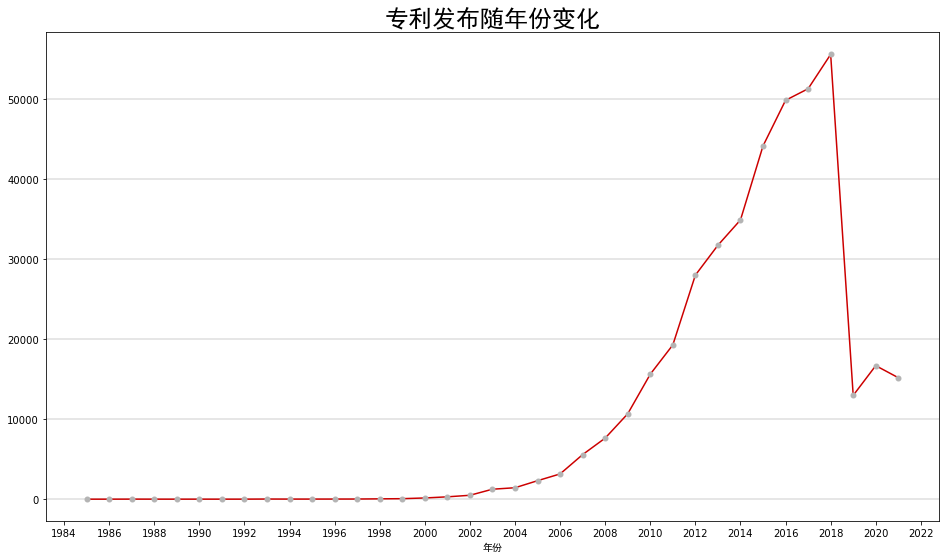

In [46]:
#用折线图来表示每年申报数量
year_amount=df_patent.groupby('year').size()
#绘制折线图
plt.figure(figsize=(16,9))

plt.xlabel('年份',fontproperties=my_font)
plt.title('专利发布随年份变化',fontproperties=my_font,fontsize=24)

x =year_amount.index
y =year_amount.values
plt.plot(x,y,markeredgecolor='#B4B4B4',marker='.',markeredgewidth=3,color='#CC0000')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.grid(axis='y',color='#AEAEAE',alpha=0.3,linewidth=2)
plt.show()

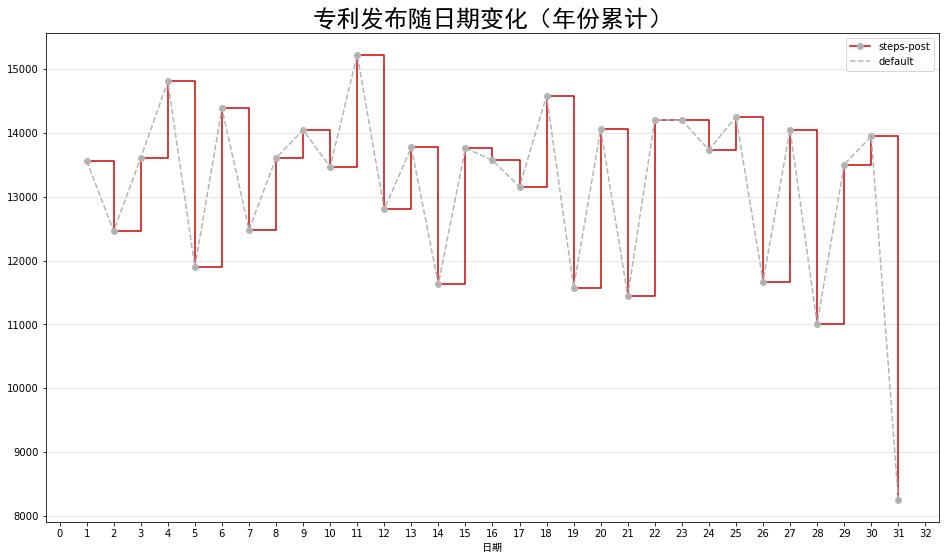

In [47]:
#用折线图来表示每日申报数量（虽然有2月在会有点不公平）
day_amount=df_patent.groupby('day').size()
#绘制折线图
plt.figure(figsize=(16,9))

plt.xlabel('日期',fontproperties=my_font)
plt.title('专利发布随日期变化（年份累计）',fontproperties=my_font,fontsize=24)

x =day_amount.index
y =day_amount.values
plt.plot(x,y,markeredgecolor='#B4B4B4',marker='.',markeredgewidth=4,color='#CC0000',
         drawstyle='steps-post',label='steps-post')
plt.plot(x,y,'--',color='#B4B4B4',label='default')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.grid(axis='y',color='#AEAEAE',alpha=0.3,linewidth=1)
plt.legend()

plt.show()

In [48]:
year_amount.quantile(0.75)

15635.0

分析上两张图我们可见：
1. 没有特定日期对发布专利有好处（31号$\times 2$算下来也是差不多15k），而且基本在13k上下浮动
2. 可见专利发表在2018年前呈现加速上升的趋势，到2019年后骤跌，且之后几年维持低迷的局势
3. 上四分位数显示前75%年中专利发布是不高于15635的，意味着2010年-2018年就是**黄金年代**了。
****
## 分析专利发布的黄金时间（到年、到月或时间段均可）、对专利数量随时间（月为单位）变化进行可视化展示

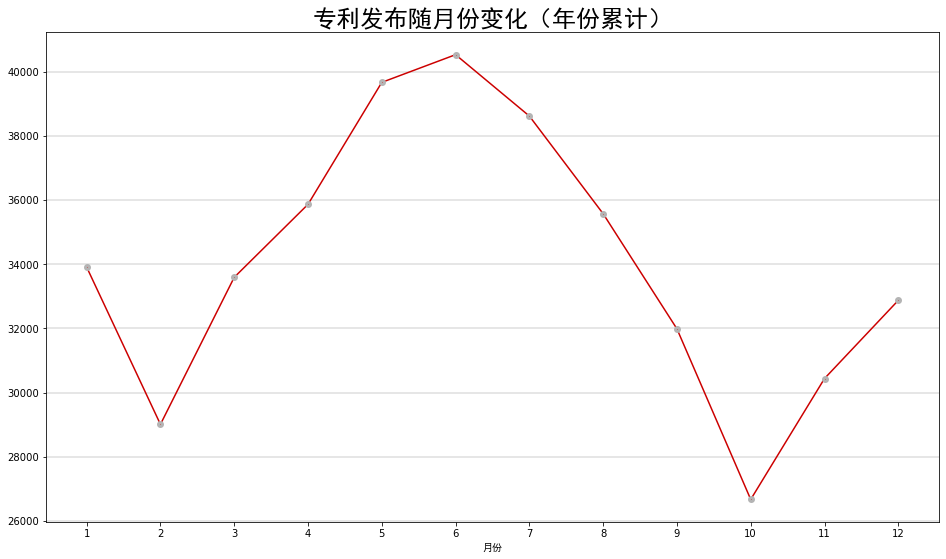

In [49]:
#用折线图来表示每月申报数量
month_amount=df_patent.groupby('month').size()
#绘制折线图
plt.figure(figsize=(16,9))

plt.xlabel('月份',fontproperties=my_font)
plt.title('专利发布随月份变化（年份累计）',fontproperties=my_font,fontsize=24)

x =month_amount.index
y =month_amount.values
plt.plot(month_amount.index,month_amount.values,
         markeredgecolor='#B4B4B4',marker='.',markeredgewidth=4,color='#CC0000')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.grid(axis='y',color='#AEAEAE',alpha=0.3,linewidth=2)
plt.show()

# 找出拥有数量前10的专利的企业并进行可视化展示

In [50]:
patent_top10= df_patent.groupby('company').size().sort_values(ascending=False).head(10)
patent_top10

company
中芯国际集成电路制造(上海)有限公司       13840
中国石油化工股份有限公司上海石油化工研究院     7732
上海华力微电子有限公司               4858
上海汽车集团股份有限公司              4441
上海华虹宏力半导体制造有限公司           3982
中国建筑第八工程局有限公司             3839
泛亚汽车技术中心有限公司              3490
上海诺基亚贝尔股份有限公司             2853
上海微电子装备(集团)股份有限公司         2851
展讯通信(上海)有限公司              2674
dtype: int64

In [51]:
sum=0
p=[]

for s in patent_top10:
    sum +=s
    
for s in patent_top10:
    p.append(s*100/float(sum))
    
patent_top10=pd.concat([patent_top10,pd.Series(p,index=patent_top10.index)],axis=1)
patent_top10.columns=['amount','proportion']
patent_top10

,amount,proportion
company,,
中芯国际集成电路制造(上海)有限公司,13840,27.373418
中国石油化工股份有限公司上海石油化工研究院,7732,15.292722
上海华力微电子有限公司,4858,9.608386
上海汽车集团股份有限公司,4441,8.783623
上海华虹宏力半导体制造有限公司,3982,7.875791
中国建筑第八工程局有限公司,3839,7.592959
泛亚汽车技术中心有限公司,3490,6.902690
上海诺基亚贝尔股份有限公司,2853,5.642801
上海微电子装备(集团)股份有限公司,2851,5.638845


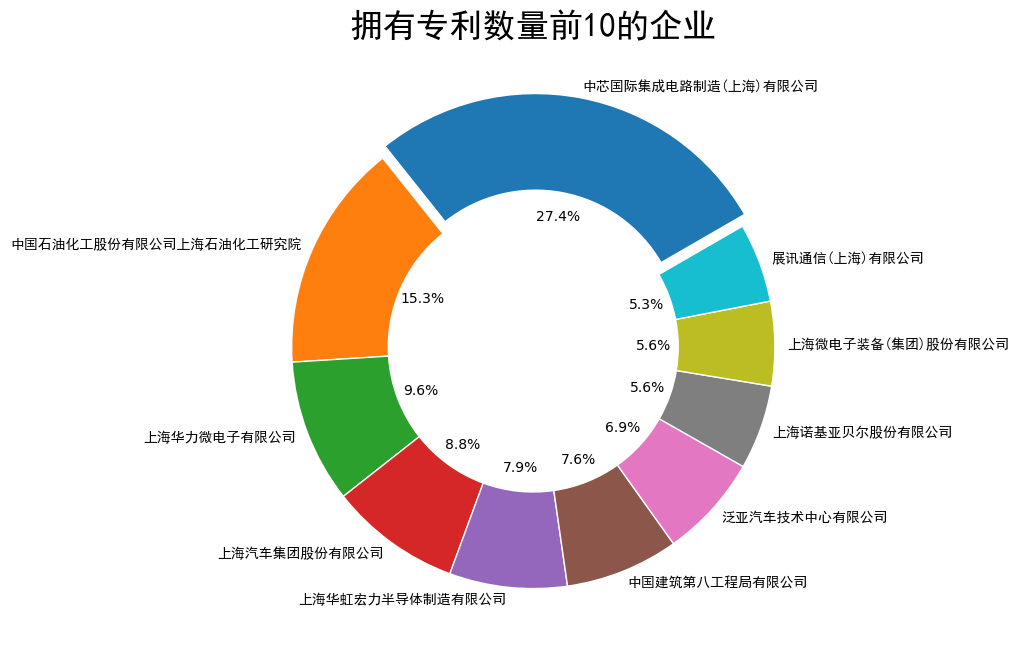

In [52]:
plt.figure(figsize=(10,8),dpi=100)
label = patent_top10.index
data = patent_top10['proportion']/100
explode = [0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]


p=plt.pie(data,labels=label,autopct='%3.1f%%',explode=explode,startangle=30,
          pctdistance=0.5,labeldistance=1.05,
         wedgeprops=dict(width=0.4,edgecolor='w'))
for font in p[1]:
    font.set_fontproperties(my_font)
    
plt.title('拥有专利数量前10的企业',fontproperties=my_font,fontsize=24)
plt.show()

# 找出拥有数量前10的软著的企业并进行可视化展示

In [53]:
df_ServGua=ReadDict('/Users/improvise/Desktop/ParMet Lab/一面培训/05深度学习/task/task/02_企业数据分析/“大师杯”数据集/“大师杯”数据集/企业软著信息.txt')
df_ServGua

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/148130 [00:00<?, ?it/s]

  0%|          | 0/148130 [00:00<?, ?it/s]

  0%|          | 0/148130 [00:00<?, ?it/s]

  0%|          | 0/148130 [00:00<?, ?it/s]

  0%|          | 0/148130 [00:00<?, ?it/s]

  0%|          | 0/148130 [00:00<?, ?it/s]

  0%|          | 0/148130 [00:00<?, ?it/s]

  0%|          | 0/148130 [00:00<?, ?it/s]

  0%|          | 0/148130 [00:00<?, ?it/s]

  0%|          | 0/148130 [00:00<?, ?it/s]

  0%|          | 0/148130 [00:00<?, ?it/s]

  0%|          | 0/148130 [00:00<?, ?it/s]

,id,company,software_name,short_name,batch_num,reg_no,reg_date,type_code,first_date,nationality,software_type,software_work
0,9b257e480da24497816f07e129ddb8a5,上海鸿翼软件技术股份有限公司,鸿翼工程协同设计内容管理平台软件,EPC,V5.0,2020SR1103302,2020-09-15,其他行业,None,-,其他软件,上海鸿翼软件技术股份有限公司
1,31b6b3e9708941948964f8f708cdbde2,上海中基国威电子股份有限公司,一种基于LCD型遥控专用单片机的智能空调遥控软件,-,V1.0,2019SR0173225,2019-02-22,其他行业,None,-,操作系统,上海中基国威电子股份有限公司
2,9fcd8434c6f84bac81554367e850afdd,上海中基国威电子股份有限公司,一种基于内置OPA的遥控专用单片机的智能学习遥控软件,-,V1.0,2019SR0172873,2019-02-22,其他行业,2018-10-03,-,操作系统,上海中基国威电子股份有限公司
3,9087242080864ac79c7786d99c9dee62,上海中基国威电子股份有限公司,一种基于电容式触控单片机的按键触控软件,-,V1.0,2019SR0173222,2019-02-22,其他行业,2016-12-15,-,操作系统,上海中基国威电子股份有限公司
4,cff1f231153c47f38c42ad10540b1a74,上海中基国威电子股份有限公司,一种基于低功耗单模蓝牙处理器的蓝牙遥控软件,-,V1.0,2019SR0172864,2019-02-22,其他行业,2018-12-26,-,操作系统,上海中基国威电子股份有限公司
...,...,...,...,...,...,...,...,...,...,...,...,...
148125,ee046d142309476cb09fdcf98bc355ba,上海市固体废物处置有限公司,固体废物(一次性医塑)资源化利用处理3D仿真培训软件,-,V1.0,2016SR392430,2016-12-24,其他行业,2016-09-30,中国,行业应用软件,上海市固体废物处置中心
148126,80da9f9d4c7d49a586a6abfa50d9704e,上海市固体废物处置有限公司,固体废物(飞灰)水洗资源化利用处理3D仿真培训软件,-,V1.0,2016SR392903,2016-12-24,其他行业,2016-09-30,中国,行业应用软件,上海市固体废物处置中心
148127,94731fdd01ef4c98a884e4d1cb92ffac,上海市固体废物处置有限公司,固体废物填埋处置3D仿真培训软件,-,V1.0,2016SR396290,2016-12-26,其他行业,2016-09-30,中国,行业应用软件,上海市固体废物处置中心
148128,68d259a0cf344d8793ced2f6765781f5,上海市固体废物处置有限公司,物流管理信息系统,-,V2.0,2017SR009286,2017-01-10,其他行业,2015-12-31,中国,行业应用软件,上海市固体废物处置中心


In [54]:
ServGua_top10= df_ServGua.groupby('company').size().sort_values(ascending=False).head(10)
ServGua_top10

company
上海宝信软件股份有限公司          728
万达信息股份有限公司            722
上海电气泰雷兹交通自动化系统有限公司    363
上海圣剑网络科技股份有限公司        361
上海风语筑展示股份有限公司         356
上海汽车集团股份有限公司          352
携程计算机技术(上海)有限公司       329
公安部第三研究所              293
卫宁健康科技集团股份有限公司        283
上海中软华腾软件系统有限公司        276
dtype: int64

In [55]:
sum=0
p=[]

for s in ServGua_top10:
    sum +=s
    
for s in ServGua_top10:
    p.append(s*100/float(sum))
    
ServGua_top10=pd.concat([ServGua_top10,pd.Series(p,index=ServGua_top10.index)],axis=1)
ServGua_top10.columns=['amount','proportion']
ServGua_top10

,amount,proportion
company,,
上海宝信软件股份有限公司,728,17.917795
万达信息股份有限公司,722,17.770121
上海电气泰雷兹交通自动化系统有限公司,363,8.934285
上海圣剑网络科技股份有限公司,361,8.885060
上海风语筑展示股份有限公司,356,8.761999
上海汽车集团股份有限公司,352,8.663549
携程计算机技术(上海)有限公司,329,8.097465
公安部第三研究所,293,7.211420
卫宁健康科技集团股份有限公司,283,6.965297


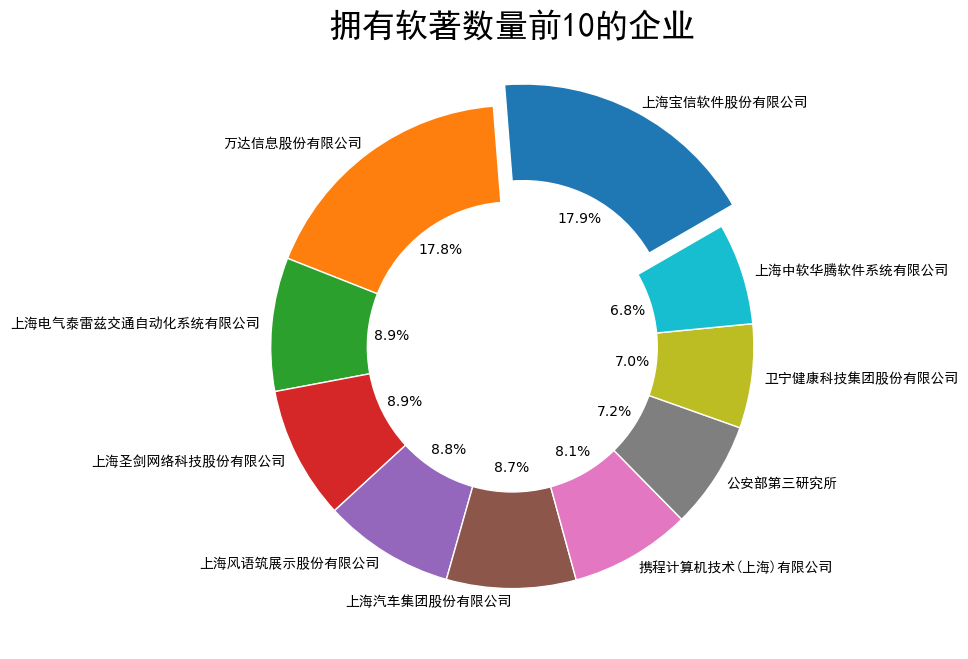

In [56]:
plt.figure(figsize=(10,8),dpi=100)
label = ServGua_top10.index
data = ServGua_top10['proportion']/100
explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]


p=plt.pie(data,labels=label,autopct='%3.1f%%',explode=explode,startangle=30,
          pctdistance=0.5,labeldistance=1.05,
         wedgeprops=dict(width=0.4,edgecolor='w'))
for font in p[1]:
    font.set_fontproperties(my_font)
    
plt.title('拥有软著数量前10的企业',fontproperties=my_font,fontsize=24)
plt.show()

# 探索上海各行业拥有软著的企业的数量，并对数量占前10的类别进行可视化展示
（企业软著信息中）
***
我们先对行业做分类

In [57]:
df_ServGua

,id,company,software_name,short_name,batch_num,reg_no,reg_date,type_code,first_date,nationality,software_type,software_work
0,9b257e480da24497816f07e129ddb8a5,上海鸿翼软件技术股份有限公司,鸿翼工程协同设计内容管理平台软件,EPC,V5.0,2020SR1103302,2020-09-15,其他行业,None,-,其他软件,上海鸿翼软件技术股份有限公司
1,31b6b3e9708941948964f8f708cdbde2,上海中基国威电子股份有限公司,一种基于LCD型遥控专用单片机的智能空调遥控软件,-,V1.0,2019SR0173225,2019-02-22,其他行业,None,-,操作系统,上海中基国威电子股份有限公司
2,9fcd8434c6f84bac81554367e850afdd,上海中基国威电子股份有限公司,一种基于内置OPA的遥控专用单片机的智能学习遥控软件,-,V1.0,2019SR0172873,2019-02-22,其他行业,2018-10-03,-,操作系统,上海中基国威电子股份有限公司
3,9087242080864ac79c7786d99c9dee62,上海中基国威电子股份有限公司,一种基于电容式触控单片机的按键触控软件,-,V1.0,2019SR0173222,2019-02-22,其他行业,2016-12-15,-,操作系统,上海中基国威电子股份有限公司
4,cff1f231153c47f38c42ad10540b1a74,上海中基国威电子股份有限公司,一种基于低功耗单模蓝牙处理器的蓝牙遥控软件,-,V1.0,2019SR0172864,2019-02-22,其他行业,2018-12-26,-,操作系统,上海中基国威电子股份有限公司
...,...,...,...,...,...,...,...,...,...,...,...,...
148125,ee046d142309476cb09fdcf98bc355ba,上海市固体废物处置有限公司,固体废物(一次性医塑)资源化利用处理3D仿真培训软件,-,V1.0,2016SR392430,2016-12-24,其他行业,2016-09-30,中国,行业应用软件,上海市固体废物处置中心
148126,80da9f9d4c7d49a586a6abfa50d9704e,上海市固体废物处置有限公司,固体废物(飞灰)水洗资源化利用处理3D仿真培训软件,-,V1.0,2016SR392903,2016-12-24,其他行业,2016-09-30,中国,行业应用软件,上海市固体废物处置中心
148127,94731fdd01ef4c98a884e4d1cb92ffac,上海市固体废物处置有限公司,固体废物填埋处置3D仿真培训软件,-,V1.0,2016SR396290,2016-12-26,其他行业,2016-09-30,中国,行业应用软件,上海市固体废物处置中心
148128,68d259a0cf344d8793ced2f6765781f5,上海市固体废物处置有限公司,物流管理信息系统,-,V2.0,2017SR009286,2017-01-10,其他行业,2015-12-31,中国,行业应用软件,上海市固体废物处置中心


先简单查看有哪些标签

In [58]:
df_ServGua['type_code'].drop_duplicates()

0                       其他行业
41        通信设备、计算机及其他电子设备制造业
47                   专业技术服务业
51                     居民服务业
53                     其他服务业
                 ...        
74768                   国际组织
76307                非金属矿采选业
83508                化学纤维制造业
115912              基层群众自治组织
117802      皮革、毛皮、羽毛(绒)及其制品业
Name: type_code, Length: 98, dtype: object

In [59]:
A=df_ServGua.groupby(['type_code','company']).agg({'company':'count'})
ServGua_type_top10=pd.DataFrame(columns=['type','company_size'])
iter=0
TYPEtemp=str()

for (TYPE,company) in A.index:
    if TYPEtemp!=TYPE:
        val=A.loc[TYPE,:].size
        ServGua_type_top10=pd.concat([ServGua_type_top10,
                                      pd.DataFrame([TYPE,val], index=['type','company_size'], columns=[iter]).T])
        TYPEtemp=TYPE
        iter+=1
    
ServGua_type_top10= ServGua_type_top10.set_index('type')
ServGua_type_top10=ServGua_type_top10.sort_values(by='company_size',ascending=False).head(10)
ServGua_type_top10

,company_size
type,
其他行业,5873
计算机服务业,664
通信设备、计算机及其他电子设备制造业,516
软件业,495
商务服务业,394
电信和其他信息传输服务业,350
专用设备制造业,348
其他服务业,290
教育,283


In [60]:
sum=0
p=[]

for s in ServGua_type_top10['company_size']:
    sum +=s
    
for s in ServGua_type_top10['company_size']:
    p.append(s*100/float(sum))
    
ServGua_type_top10=pd.concat([ServGua_type_top10,pd.Series(p,index=ServGua_type_top10.index)],axis=1)
ServGua_type_top10.columns=['company_size','proportion']
ServGua_type_top10

,company_size,proportion
type,,
其他行业,5873,62.108714
计算机服务业,664,7.021997
通信设备、计算机及其他电子设备制造业,516,5.456853
软件业,495,5.234772
商务服务业,394,4.166667
电信和其他信息传输服务业,350,3.701354
专用设备制造业,348,3.680203
其他服务业,290,3.066836
教育,283,2.992809


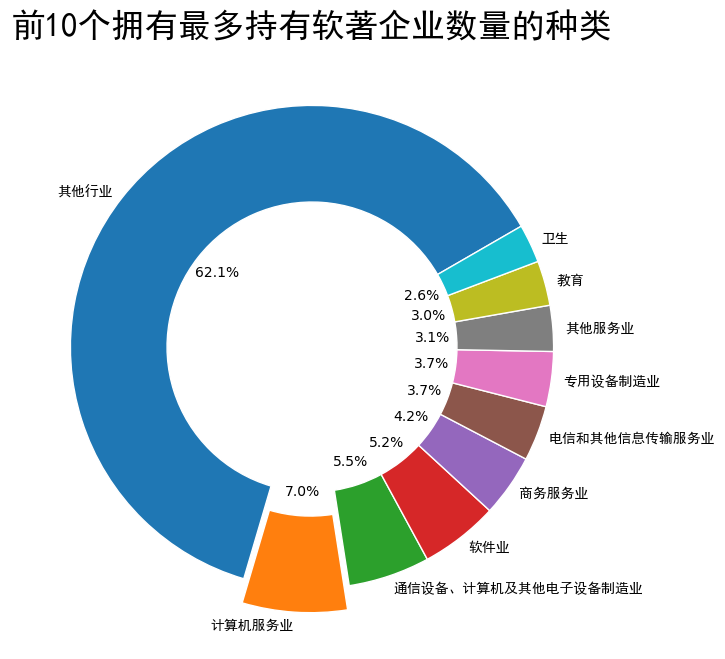

In [61]:
plt.figure(figsize=(10,8),dpi=100)
label = ServGua_type_top10.index
data = ServGua_type_top10['proportion']
explode=[0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

p=plt.pie(data,labels=label,autopct='%3.1f%%',startangle=30,explode=explode,
          pctdistance=0.5,labeldistance=1.05,
         wedgeprops=dict(width=0.4,edgecolor='w'))
for font in p[1]:
    font.set_fontproperties(my_font)
    
plt.title('前10个拥有最多持有软著企业数量的种类',fontproperties=my_font,fontsize=24)
plt.show()

# 探索一个企业拥有失信被执行人数量与受到行政处罚的关联
我们先分别导入企业失信被执行人数据和行政处罚数据，然后做一些数据清洗

In [62]:
df_credit=ReadDict('/Users/improvise/Desktop/ParMet Lab/一面培训/05深度学习/task/task/02_企业数据分析/“大师杯”数据集/“大师杯”数据集/失信被执行人.txt')
df_credit

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2784 [00:00<?, ?it/s]

  0%|          | 0/2784 [00:00<?, ?it/s]

  0%|          | 0/2784 [00:00<?, ?it/s]

  0%|          | 0/2784 [00:00<?, ?it/s]

  0%|          | 0/2784 [00:00<?, ?it/s]

  0%|          | 0/2784 [00:00<?, ?it/s]

  0%|          | 0/2784 [00:00<?, ?it/s]

,id,company,verdict_no,implement_no,verdict_date,perform_status,implement_court
0,feac96ea2f2c48c7bd2e8af0b7db18e3,上海瑞孚电子科技有限公司,None,None,2019-02-02,全部未履行,None
1,09728ad010ad4408ad6b0942fe57fa24,上海瑞孚电子科技有限公司,None,None,2019-02-01,全部未履行,None
2,74931588e61c484493b1528fd180697d,上海瑞孚电子科技有限公司,None,None,2018-10-09,全部未履行,None
3,5ffd10c22e254cff816b4cc9870eb67e,上海瑞孚电子科技有限公司,None,None,2018-10-12,全部未履行,None
4,fa63b585d8eb4e648250c0fc1509edbd,上海瑞孚电子科技有限公司,None,None,2018-05-02,全部未履行,None
...,...,...,...,...,...,...,...
2779,e4bf640c5b264cdabdbfe221b15e92eb,上海永跃电子科技有限公司,松劳人仲(2019)办字第515号,(2019)沪0117执4647号,2019-08-09,全部未履行,上海市松江区人民法院
2780,7dff3a21052241f28bcd841a3ca22f08,上海惠邦特种涂料有限公司,(2019)浙0604民初1158号,(2019)浙0604执1909号,2019-04-29,全部未履行,绍兴市上虞区人民法院
2781,78e8fb6549564b38be116a476b928543,上海永跃电子科技有限公司,松劳人仲(2019)办字第514号,(2019)沪0117执4644号,2019-08-09,全部未履行,上海市松江区人民法院
2782,9277ed34c0ae4965ad071cd5b0224bda,上海永跃电子科技有限公司,(2016)沪01民终10273号,(2019)沪0117执恢117号,2019-07-02,全部未履行,上海市松江区人民法院


In [63]:
df_credit['perform_status'].drop_duplicates()

0      全部未履行
172    部分未履行
Name: perform_status, dtype: object

In [64]:
print(df_credit.isnull().any())

id                 False
company            False
verdict_no          True
implement_no        True
verdict_date       False
perform_status     False
implement_court     True
dtype: bool


In [65]:
df_credit.isnull().sum()

id                    0
company               0
verdict_no         1244
implement_no       1244
verdict_date          0
perform_status        0
implement_court    1244
dtype: int64

我们看到`裁决`，`执行``执行法庭`都各有`1244`行空缺。大概率是1244行中都有这三个空缺。我们就先扔掉然后看看行数是不是相符这样的假设。

In [66]:
df_creditB=df_credit.dropna(axis=0, how='any')
df_creditB

,id,company,verdict_no,implement_no,verdict_date,perform_status,implement_court
1244,6de2c7d9e8f64209a0bdf77cb710a7d4,上海实甲智能科技股份有限公司,(2018)豫0191民初12638号,(2019)豫0191执6935号,2019-05-27,全部未履行,郑州高新技术产业开发区人民法院
1245,c722cbaad93646a48fb61b82ce4a3e64,上海丰汇医学科技股份有限公司,(2016)沪仲案字第1839号,(2017)沪01执00125号,2017-02-08,全部未履行,上海市第一中级人民法院
1246,cf6d0e39add341dcb8a60a3ecd43183c,上海丰汇医学科技股份有限公司,(2016)沪0115民初67848号,(2017)沪0115执3761号,2017-02-15,全部未履行,上海市浦东新区人民法院
1247,1ff7a058de644f9fb052ee2e60c72f60,上海丰汇医学科技股份有限公司,(2016)沪0104民初28714号,(2017)沪0104执3404号,2017-07-18,全部未履行,上海市徐汇区人民法院
1248,3171531f8c2d47dd8fddb3ebcb619342,上海柯力士信息安全技术有限公司,(2019)沪0106民初15348号,(2019)沪0106执8990号,2019-08-20,全部未履行,上海市静安区人民法院
...,...,...,...,...,...,...,...
2779,e4bf640c5b264cdabdbfe221b15e92eb,上海永跃电子科技有限公司,松劳人仲(2019)办字第515号,(2019)沪0117执4647号,2019-08-09,全部未履行,上海市松江区人民法院
2780,7dff3a21052241f28bcd841a3ca22f08,上海惠邦特种涂料有限公司,(2019)浙0604民初1158号,(2019)浙0604执1909号,2019-04-29,全部未履行,绍兴市上虞区人民法院
2781,78e8fb6549564b38be116a476b928543,上海永跃电子科技有限公司,松劳人仲(2019)办字第514号,(2019)沪0117执4644号,2019-08-09,全部未履行,上海市松江区人民法院
2782,9277ed34c0ae4965ad071cd5b0224bda,上海永跃电子科技有限公司,(2016)沪01民终10273号,(2019)沪0117执恢117号,2019-07-02,全部未履行,上海市松江区人民法院


确实是的。接下来我们就统计每个公司有多少次裁决，然后再去和行政处罚对应起来

In [67]:
df_credit_punish_ledger= df_creditB.groupby('company').size()
df_credit_punish_ledger

company
上海万丰文化传播股份有限公司      49
上海与德科技有限公司          45
上海东升焊接集团有限公司         1
上海东杰高分子材料有限公司        1
上海中卉生态科技股份有限公司       3
                    ..
艾特密信息技术股份有限公司        1
虎符智能科技股份有限公司         1
行悦信息科技股份有限公司        16
谐辰环境设备(上海)有限公司       5
银京医疗科技(上海)股份有限公司    41
Length: 147, dtype: int64

In [68]:
df_punish=ReadDict('/Users/improvise/Desktop/ParMet Lab/一面培训/05深度学习/task/task/02_企业数据分析/“大师杯”数据集/“大师杯”数据集/行政处罚.txt')
df_punish

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10570 [00:00<?, ?it/s]

  0%|          | 0/10570 [00:00<?, ?it/s]

  0%|          | 0/10570 [00:00<?, ?it/s]

  0%|          | 0/10570 [00:00<?, ?it/s]

  0%|          | 0/10570 [00:00<?, ?it/s]

  0%|          | 0/10570 [00:00<?, ?it/s]

  0%|          | 0/10570 [00:00<?, ?it/s]

  0%|          | 0/10570 [00:00<?, ?it/s]

  0%|          | 0/10570 [00:00<?, ?it/s]

  0%|          | 0/10570 [00:00<?, ?it/s]

  0%|          | 0/10570 [00:00<?, ?it/s]

,id,company,penalties,penalties_date,penalties_number,penalties_type,cause,basis,result,publish_date,status
0,d61be82c51094c51be761d395685881a,上海爱彼此家居用品股份有限公司,上海市浦东新区市场监督管理局,2016-09-30,浦市监案处字〔2016〕第150201629614号,None,None,None,None,None,None
1,63fc8e152df54340bdeeaa92de0ad6d9,上海竞天科技股份有限公司,上海市浦东新区建设和交通委员会,2019-09-10,上海市浦东新区建设和交通委员会第2120190025号,None,None,None,None,None,None
2,207a42ca80d74a00aafe0ddbf0c68a60,上海永红汽车零部件有限公司,上海市嘉定区城市交通行政执法大队,2016-12-12,2162440995,None,None,None,None,None,None
3,63374e00b2dc4b3185323f417b702d73,上海永红汽车零部件有限公司,嘉定区市场监督管理局,2011-09-08,沪工商嘉案处字〔2011〕第140201113506号,罚款,None,None,None,None,None
4,42865024a67043e7acbd5a21d05c8d32,上海驿动自动化科技有限公司,上海市金山区税务局第十二税务所,2017-11-09,13102282017000026790,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
10565,04241d482c3842ee9c6923149350651f,上海汉神机电股份有限公司,上海市宝山区建设和交通委员会交通执法大队,2017-12-04,2172341198,罚款,未按照规定的周期和频次进行车辆综合性能检测和技术等级评定的处罚,《道路运输车辆技术管理规定》第三十一条第三项,罚款1000元,None,正常
10566,4ec3575f29a247b094eb200d120b910e,上海美科阀门有限公司,嘉定区市场监督管理局,2011-07-20,沪工商嘉案处字〔2011〕第140201110380号,罚款,违法,《中华人民共和国公司法》第一百九十九条,None,None,正常
10567,b968c85edd414199a54a335bc9bcb2c6,上海市固体废物处置有限公司,上海市交通委员会执法总队,2019-03-14,2190142233,罚款,对道路货运经营者不规范经营、服务的处罚,None,罚款,None,正常
10568,52fcc7b39259410fabdd1d5da5e63875,上海金湖挤出设备有限公司,嘉定消防支队,2016-03-09,沪嘉公(消)行罚决字[2016]0031号,罚款,消防设施未保持完好有效的情形,《中华人民共和国消防法》第六十条第一款第一项,罚款人民币叁万元整,None,正常


In [69]:
df_punish.isnull().any()

id                  False
company             False
penalties            True
penalties_date       True
penalties_number    False
penalties_type       True
cause                True
basis                True
result               True
publish_date         True
status               True
dtype: bool

In [70]:
df_punish.isnull().sum()

id                      0
company                 0
penalties              59
penalties_date        132
penalties_number        0
penalties_type       4732
cause                6813
basis                7504
result               5736
publish_date        10570
status               4917
dtype: int64

In [71]:
df_punish.groupby('company').size()

company
3M中国有限公司              7
万向钱潮(上海)汽车系统有限公司      4
万年青(上海)运动器材有限公司       3
万达信息股份有限公司            3
万高(上海)汽车服务有限公司        1
                     ..
麦太保电动工具(中国)有限公司       3
麦格纳斯太尔汽车技术(上海)有限公司    2
鼎捷软件股份有限公司            1
龙净科杰环保技术(上海)有限公司      2
龙工(上海)机械部件有限公司        2
Length: 2646, dtype: int64

这里我们不太好处理，或许将前面的100多个企业拿来和这里的一一对应是个好主意
***
下面我们用表级链接的方式找出同时在行政处罚和失信被执行人中的企业以及在对应方面受到了几次惩罚

In [72]:
df_credit_punish_ledger=pd.concat([df_credit_punish_ledger,df_punish.groupby('company').size()],axis=1,join='inner')
df_credit_punish_ledger.columns=['credit','punish']
df_credit_punish_ledger

,credit,punish
company,,
上海与德科技有限公司,45,1
上海东升焊接集团有限公司,1,2
上海东杰高分子材料有限公司,1,8
上海中赢金融信息服务有限公司,1,2
上海丰汇医学科技股份有限公司,3,1
...,...,...
圣美申医疗科技(上海)有限公司,1,3
尚德太阳能电力有限公司,1,3
新煤化工设计院(上海)有限公司,1,1


In [73]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

下面我们用散点图的方法来看看这两者之间的关系

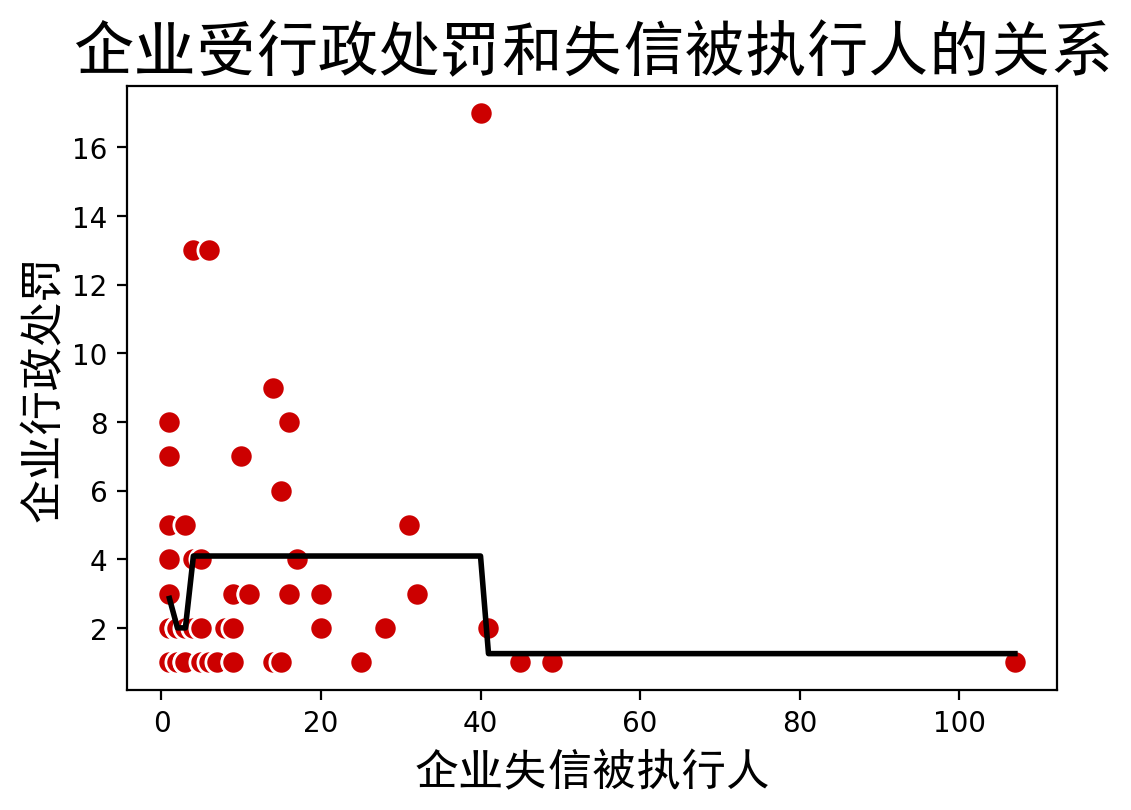

In [74]:
from sklearn.tree import DecisionTreeRegressor

x= df_credit_punish_ledger['credit'].values
y= df_credit_punish_ledger['punish'].values
plt.rcParams['figure.dpi']=200
tree=DecisionTreeRegressor(max_depth=2)
tree.fit(x.reshape(-1,1),y)
sort_idx=x.flatten().argsort()

#绘制散点图
def lin_regplot(x,y,model):
    plt.scatter(x,y,c='#CC0000',edgecolor='white',s=70,label='Original')
    plt.plot(x,model.predict(x),color='black',lw=2,label='Decision Tree')
    return None

lin_regplot(x[sort_idx].reshape(-1,1),y[sort_idx],tree)
plt.title('企业受行政处罚和失信被执行人的关系',fontproperties=my_font,fontsize=22)
plt.xlabel('企业失信被执行人',fontproperties=my_font,fontsize=16)
plt.ylabel('企业行政处罚',fontproperties=my_font,fontsize=16)

plt.show()

我高中接触过一点点DecisionTree，虽然现在只记得它的名字以及他能做简单的回归预测，就网上找着改了改，但是效果不是很明显。这很可能是数据处理导致的，但是我不知道是不是哪里出错了

# 探索企业舆论知名度（新闻数量）与拥有控股企业数量之间的关系

In [75]:
df_news=ReadDict('/Users/improvise/Desktop/ParMet Lab/一面培训/05深度学习/task/task/02_企业数据分析/“大师杯”数据集/“大师杯”数据集/新闻资讯.txt')
df_holdingcompany=ReadDict('/Users/improvise/Desktop/ParMet Lab/一面培训/05深度学习/task/task/02_企业数据分析/“大师杯”数据集/“大师杯”数据集/控股企业.txt')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/21060 [00:00<?, ?it/s]

  0%|          | 0/21060 [00:00<?, ?it/s]

  0%|          | 0/21060 [00:00<?, ?it/s]

  0%|          | 0/21060 [00:00<?, ?it/s]

  0%|          | 0/21060 [00:00<?, ?it/s]

  0%|          | 0/21060 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/25200 [00:00<?, ?it/s]

  0%|          | 0/25200 [00:00<?, ?it/s]

  0%|          | 0/25200 [00:00<?, ?it/s]

  0%|          | 0/25200 [00:00<?, ?it/s]

  0%|          | 0/25200 [00:00<?, ?it/s]

In [76]:
print(df_news.isnull().sum(),end='\n\n')
print(df_holdingcompany.isnull().sum())

id                  0
company             0
from_url            0
topic_content       0
topic_time       2192
topic_title         0
dtype: int64

id            0
company       0
path_data     0
ent_name      0
proportion    0
dtype: int64


In [77]:
df_news

,id,company,from_url,topic_content,topic_time,topic_title
0,c4b54308010142629c9bbd30aac5789c,上海市固体废物处置有限公司,/yuqing?yuqingId=67cf6f0b18117f4051fff19f47590011,东方网记者柏可林3月9日报道：3月9日，上海市固体废物处置中心（二期）工程项目在老港生态环保...,2021-03-09 19:31:00,上海固体废物处置中心二期开工 将成国内首座半地下双层刚性填埋库
1,25e8459682b44db4bfe868e33b4477af,上海市固体废物处置有限公司,/yuqing?yuqingId=e766672efa8c658a9292f8abf4cbb05a,君子务本，本立而道生。—— 孔子《论语·学而》“本”指根本，“道”在这里指治国做人的基本原则...,2021-02-08 10:30:00,周观察｜《医疗器械临床使用管理办法》3月1日施行，河南村医将“乡聘村用”！
2,1ed9bd762b0d42d8bf23f48591a3d74f,上海市固体废物处置有限公司,/yuqing?yuqingId=3b0d610cd7eb906d955a4561e5451204,“被告人国某未取得医生执业资格非法行医，其行为已构成非法行医罪，判处有期徒刑一年三个月，缓刑...,2020-11-23 15:24:00,面对一起非法行医案件 公益诉讼检察官激活“民事磋商”模式
3,3e382b6bc0df413cb7c8bdac61ba4bfe,上海市固体废物处置有限公司,/yuqing?yuqingId=8fc73b610f41f6d82226f237f4978b97,立即报名！即将满额！——ISWMS固危废年度盛会-第三届国际固体废弃物峰会与您11月相约上海...,2020-10-21 02:00:00,要闻 | 北极星环保网
4,a52e7efbd09c43968e5d01d5659e1c78,上海市固体废物处置有限公司,/yuqing?yuqingId=f57dffb0b999734d7952488d09dcebe9,新冠肺炎疫情进入抗疫常态化，国家再次加码医疗废物处置行业，该行业也首次迎来了扩容春天。9月7...,2020-09-18 00:00:00,45亿投资预算，医废处置按下“加速键”，行业两大能力缺口何解？
...,...,...,...,...,...,...
21055,007570d6df734737b8055fc9be2c39c7,上海三友医疗器械股份有限公司,/yuqing?yuqingId=b2eafec4d8fba622696a49b4cdfe79e2,本周横跨2019年与2020年，周内科创板新增受理企业3家，问询企业15家，注册生效企业3家...,2020-01-05 20:38:00,本周科创板上会与提交注册均空档 下周2家企业赶考
21056,e3f497243e0347758abda687686c6c6d,上海华虹宏力半导体制造有限公司,/yuqing?yuqingId=8d6fccd40e624f1fe3c6933b4ca83f22,据Gartner的预测，到2020年，除智能手机、PC和平板电脑外，物联网终端出货量将达到3...,2019-10-18 08:45:00,关于芯片制造和特色工艺之间的联系
21057,87bf88b0020b4f3885f007eae241ac8d,上海电气电站设备有限公司,/yuqing?yuqingId=81ece4ed6e7b42f702d0d49de25faf6c,长期致力于推动重型燃气轮机核心技术自主研发的中国工程院院士、清华大学能源与动力工程系教授蒋洪...,2020-01-05 16:29:00,院士蒋洪德辞世 生前致力推动国产重型燃机研发
21058,257be43564094c939e66a84925a7eee1,上海复旦张江生物医药股份有限公司,/yuqing?yuqingId=e769bc3aa1696adcaf6166e4901416ca,上海复旦张江生物医药股份有限公司（公司简称：复旦张江）是一家主要从事光动力药物、口服固体制剂...,2019-10-17 17:43:00,复旦张江上会在即，大秀“财技”或虚增利润近千万


In [78]:
df_holdingcompany

,id,company,path_data,ent_name,proportion
0,b72e82d963bc410995b77a73ec9eec66,上海浩方在线信息技术有限公司,"[{'pathList': [{'pid': '13747820071716', 'perc...",上饶市旗趣网络科技有限公司,100.0
1,831f42d780094828aff9f269cb7ffd24,上海浩方在线信息技术有限公司,"[{'pathList': [{'pid': '13747820071716', 'perc...",杭州博趣文化传媒有限公司,100.0
2,6bd68b17500344f19a92b3e3d3c1bd17,上海浩方在线信息技术有限公司,"[{'pathList': [{'pid': '13765626030836', 'perc...",杭州赛云电竞科技有限公司,51.0
3,7e7d19e819cb43958a9ec5551d6404fa,上海东方传媒技术有限公司,"[{'pathList': [{'pid': '14413768508630', 'perc...",上海有线电视汇仁广告有限公司,60.0
4,44a1a1c28069463ca9c00d28d13d1d69,上海宏会邦智能设备有限公司,"[{'pathList': [{'pid': '10918179190960', 'perc...",江苏宏会邦智能设备有限公司,100.0
...,...,...,...,...,...
25195,a5e30283f2a143b6901e6245c6ad93ff,上海萌果信息科技有限公司,[{'pathList': [{'pid': 'xlTM-TogKuTwNbEF68bcS7...,上海汇丁信息科技有限公司,70.0
25196,221e897fadb14a90aa72560bc2a49cc8,上海萌果信息科技有限公司,[{'pathList': [{'pid': 'xlTM-TogKuTwWguXONdnI2...,上海魔游网络技术有限公司,100.0
25197,c49304c0bc904cefb2ac858bdda69b24,上海萌果信息科技有限公司,[{'pathList': [{'pid': 'xlTM-TogKuTwjvk500k584...,上海萌跃信息科技有限公司,60.0
25198,1202a45cc4b34e7b9774d5619e15e5e5,上海萌果信息科技有限公司,[{'pathList': [{'pid': 'xlTM-TogKuTw4ROW2PhSN-...,上海赢龙网络科技有限公司,95.0


第二张表单看前3行，我们发现浩方和后三家不同公司的控股比例分别是100，100，51，意味着company是控股公司，ent_name就是被控股的entity

In [79]:
df_holdingcompany.groupby('ent_name').size()

ent_name
***优品(成都)科技有限公司        1
***国创(成都)科技有限公司        1
***工场(上海)企业管理有限公司      1
***工场(上海)知识产权服务有限公司    1
***工场(上海)设计科技有限公司      1
                      ..
龙游宇森无纺科技有限公司           1
龙脉医疗器械(北京)有限公司         1
龙腾华业(北京)企业管理有限公司       1
龙阔(武汉)生物工程有限公司         2
龙阔(苏州)生物工程有限公司         1
Length: 17850, dtype: int64

In [80]:
df_news.groupby('company').size()

company
万得信息技术股份有限公司        63
万达信息股份有限公司          71
万高(上海)汽车服务有限公司      18
三信国际电器上海有限公司         1
三博生化科技(上海)有限公司       1
                    ..
龙净科杰环保技术(上海)有限公司     1
龙利得包装科技(上海)有限公司      1
龙尚科技(上海)有限公司         6
龙工(上海)叉车有限公司         3
龙工(上海)机械制造有限公司       1
Length: 2861, dtype: int64

In [81]:
df_holdcorp_news_ledger=pd.concat([df_holdingcompany.groupby('ent_name').size(),df_news.groupby('company').size()],
                                 axis=1,join='inner')
df_holdcorp_news_ledger.columns=['hold_crop','news']
df_holdcorp_news_ledger

,hold_crop,news
上海万达信息系统有限公司,1,1
上海三基电子工业有限公司,1,1
上海三思科技发展有限公司,2,1
上海三电汽车空调有限公司,2,3
上海三银涂料科技股份有限公司,1,2
...,...,...
美钻能源科技(上海)有限公司,1,2
车享汽车俱乐部(上海)有限公司,1,1
辉源生物科技(上海)有限公司,2,1
银联国际有限公司,2,19


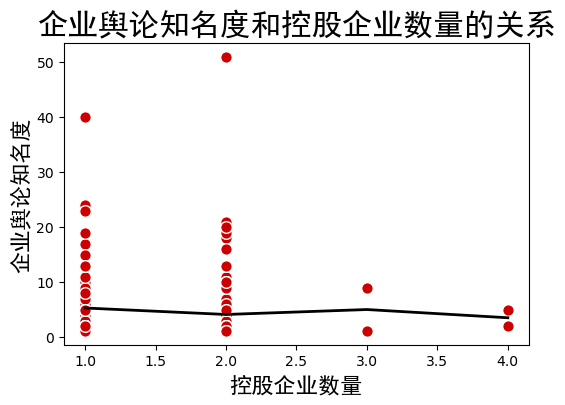

In [82]:
x= df_holdcorp_news_ledger['hold_crop'].values
y= df_holdcorp_news_ledger['news'].values
plt.rcParams['figure.dpi']=100
tree=DecisionTreeRegressor(max_depth=5)
tree.fit(x.reshape(-1,1),y)
sort_idx=x.flatten().argsort()

#绘制散点图
def lin_regplot(x,y,model):
    plt.scatter(x,y,c='#CC0000',edgecolor='white',s=70,label='Original')
    plt.plot(x,model.predict(x),color='black',lw=2,label='Decision Tree')
    return None

lin_regplot(x[sort_idx].reshape(-1,1),y[sort_idx],tree)
plt.title('企业舆论知名度和控股企业数量的关系',fontproperties=my_font,fontsize=22)
plt.xlabel('控股企业数量',fontproperties=my_font,fontsize=16)
plt.ylabel('企业舆论知名度',fontproperties=my_font,fontsize=16)

plt.show()

这里也没回归出啥，简单看看就是控股企业数量越少舆论知名度越高。
# 探索企业拥有专利数量与得到融资数量以及融资金额之间的关系
这里融资数量我们就用融资轮次的数量来计算

In [83]:
df_financing

,id,company,finance_date,finance_round,finance_amount,finance_investor,finance_news_title
0,35c7cec0c9294d87b99b0794dd69944f,上海浩方在线信息技术有限公司,2012-04-10,被收购,310000000,[浙数文化],None
1,437ed95ec97b4701afafacc7401e1239,上海房品汇网络信息技术有限公司,2015-03-03,天使轮,1000000,[华映资本],None
2,88b21413ca18440abd9dde9f3f480ec2,上海红生系统工程有限公司,2018-05-10,被收购,490000000,[泰豪集团],泰豪科技：拟4.9亿元收购上海红生100%股权
3,d16dd2529d9b45239fef765232856938,上海鸿翼软件技术股份有限公司,2018-06-04,新三板定增,25400000,[安赐资本],None
4,655c033a78004c77aa1f27d1fb427c31,上海鸿翼软件技术股份有限公司,2016-05-03,新三板定增,2500000,[投资方未知],None
...,...,...,...,...,...,...,...
4258,aa152ecf71f64c60bad819e8b087c459,普研(上海)标准技术服务股份有限公司,2018-05-17,新三板定增,30030000,[在册股东;员工],None
4259,fe0fb9fa195f469f902141d134dccccc,上海正昀新能源技术有限公司,2016-09-08,被收购,600000000,[露笑科技],None
4260,8269338e9b1f4f73b877ad0d59720ba2,上海派拉软件股份有限公司,2019-03-21,B轮,60000000,"[东方富海, 涌铧投资]",身份认证安全管理企业“派拉软件”获6000万B轮投资 东方富海领投 | 上海派拉软件
4261,01f26a17d96b4443bd9a73f1cf99577a,上海即信信息科技有限公司,2015-08-04,天使轮,1000000,[陶石资本],None


In [84]:
df_patent

,id,year,month,day,company,patent_name,patent_type,publication_date,patent_legal_status,publication_number,app_date,app_number,inventor,applicant,agent,agency,main_number,residence,abstract,legal_status
0,1da540024799407e9b1ed4e503d7be24,2021,4,16,上海康达化工新材料股份有限公司,一种用于打印机零部件和PU粘结的反应型聚氨酯热熔胶及其制备方法,发明专利,2021-04-16,None,CN112662361A,None,None,None,None,None,None,None,None,None,None
1,66b9bb0a443b4f06aca0b3d0b7e28ea2,2021,4,13,上海康达化工新材料股份有限公司,一种耐高温单组分无溶剂聚氨酯胶黏剂及其制备方法及应用,发明专利,2021-04-13,None,CN112646529A,None,None,None,None,None,None,None,None,None,None
2,6d5ac6592edf41d7b7fa710b48f9d317,2021,4,2,上海康达化工新材料股份有限公司,一种耐360℃高温环氧胶黏剂及其制备方法及应用,发明专利,2021-04-02,None,CN112592666A,None,None,None,None,None,None,None,None,None,None
3,8720e9e0291b4fecaa8a57cc18b004fa,2021,3,19,上海康达化工新材料股份有限公司,一种动车地板布用反应型聚氨酯热熔胶及其制备方法,发明专利,2021-03-19,None,CN112521900A,None,None,None,None,None,None,None,None,None,None
4,8f2ddd8ca6db4bb68fbfd5005b729153,2021,3,19,上海康达化工新材料股份有限公司,一种高韧性透明双组份丙烯酸酯胶粘剂及其制备方法,发明专利,2021-03-19,None,CN112521869A,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408740,eba908cde4154d89a503f67d489b9efb,2009,8,12,中芯国际集成电路制造(上海)有限公司,一种晶片金属引线及其制作方法,发明授权,2009-08-12,专利申请权专利权的转移,CN100527403C,None,None,None,None,None,None,None,None,None,None
408741,cc85afdb389d400e80f81dbd7b013c76,2014,10,1,中芯国际集成电路制造(上海)有限公司,硅通孔及其形成方法,发明公布,2014-10-01,授权,CN104078414A,None,None,None,None,None,None,None,None,None,None
408742,6936999fd4bb48adbcf7b3f6623858f3,2016,2,3,中芯国际集成电路制造(上海)有限公司,一种测试结构及测试方法,发明公布,2016-02-03,授权,CN105304614A,None,None,None,None,None,None,None,None,None,None
408743,66d6858eeaba44f3be04a232d3f05664,2018,11,16,中芯国际集成电路制造(上海)有限公司,鳍式场效应管及其形成方法,发明授权,2018-11-16,实质审查的生效,CN105552124B,None,None,None,None,None,None,None,None,None,None


## 企业拥有专利数量与得到融资数量

In [85]:
df_FinTimes_Patent=pd.concat([df_financing.groupby('company').size(),df_patent.groupby('company').size()],
                            axis=1, join='inner')
df_FinTimes_Patent.columns=['Financing_Times','Patent_Amount']
df_FinTimes_Patent

,Financing_Times,Patent_Amount
company,,
万得信息技术股份有限公司,5,28
万达信息股份有限公司,2,84
三生国健药业(上海)股份有限公司,2,77
上海一条网络科技有限公司,8,3
上海一橙网络科技股份有限公司,2,4
...,...,...
首帆动力科技股份有限公司,1,27
马瑞利(中国)有限公司,3,36
麦王环境技术股份有限公司,2,48


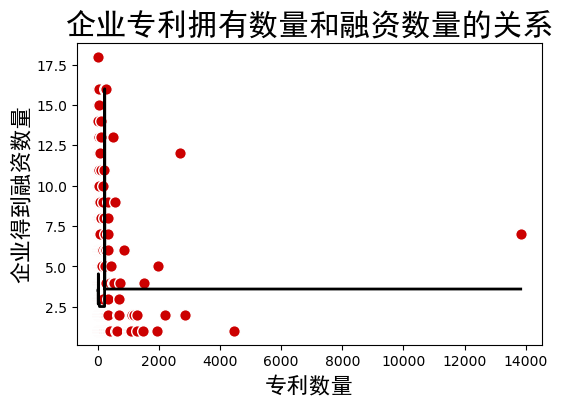

In [86]:
x= df_FinTimes_Patent['Patent_Amount'].values
y= df_FinTimes_Patent['Financing_Times'].values
plt.rcParams['figure.dpi']=100
tree=DecisionTreeRegressor(max_depth=3)
tree.fit(x.reshape(-1,1),y)
sort_idx=x.flatten().argsort()

#绘制散点图
def lin_regplot(x,y,model):
    plt.scatter(x,y,c='#CC0000',edgecolor='white',s=70,label='Original')
    plt.plot(x,model.predict(x),color='black',lw=2,label='Decision Tree')
    return None

lin_regplot(x[sort_idx].reshape(-1,1),y[sort_idx],tree)
plt.title('企业专利拥有数量和融资数量的关系',fontproperties=my_font,fontsize=22)
plt.xlabel('专利数量',fontproperties=my_font,fontsize=16)
plt.ylabel('企业得到融资数量',fontproperties=my_font,fontsize=16)

plt.show()

为啥专利越少得到融资次数反而越多呢，我觉得因为得到融资数量多的企业说明从早期开始受到的关注就多，而大多又不是科技企业，大多是兜售概念的那类，后者是不怎么需要专利的
## 企业拥有专利数量与得到融资金额

In [87]:
df_FinAmount_Patent=pd.concat([df_financing.groupby('company')['finance_amount'].sum(),df_patent.groupby('company').size()],
                            axis=1, join='inner')
df_FinAmount_Patent.columns=['Financing_Amount','Patent_Amount']
df_FinAmount_Patent

,Financing_Amount,Patent_Amount
company,,
万得信息技术股份有限公司,4124000000,28
万达信息股份有限公司,895840000,84
三生国健药业(上海)股份有限公司,1780810000,77
上海一条网络科技有限公司,340504400,3
上海一橙网络科技股份有限公司,32000000,4
...,...,...
首帆动力科技股份有限公司,19800000,27
马瑞利(中国)有限公司,47725080000,36
麦王环境技术股份有限公司,193740000,48


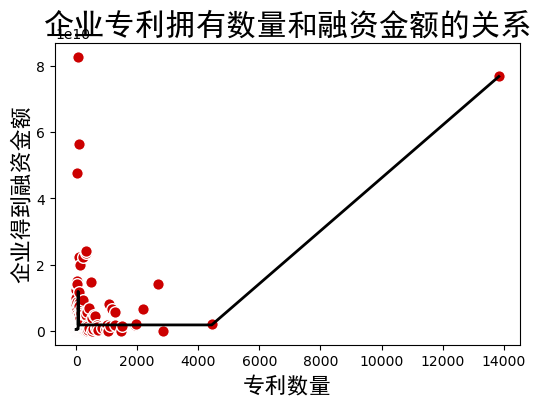

In [88]:
x= df_FinAmount_Patent['Patent_Amount'].values
y= df_FinAmount_Patent['Financing_Amount'].values
plt.rcParams['figure.dpi']=100
tree=DecisionTreeRegressor(max_depth=3)
tree.fit(x.reshape(-1,1),y)
sort_idx=x.flatten().argsort()

#绘制散点图
def lin_regplot(x,y,model):
    plt.scatter(x,y,c='#CC0000',edgecolor='white',s=70,label='Original')
    plt.plot(x,model.predict(x),color='black',lw=2,label='Decision Tree')
    return None

lin_regplot(x[sort_idx].reshape(-1,1),y[sort_idx],tree)
plt.title('企业专利拥有数量和融资金额的关系',fontproperties=my_font,fontsize=22)
plt.xlabel('专利数量',fontproperties=my_font,fontsize=16)
plt.ylabel('企业得到融资金额',fontproperties=my_font,fontsize=16)

plt.show()

虽然有去除误差点的方法，但是我时间不多了这里只能先用排除个别点的方法来重新考察。

In [89]:
df_FinAmount_PatentB=df_FinAmount_Patent.loc[(df_FinAmount_Patent['Financing_Amount']<20000000000)&(df_FinAmount_Patent['Patent_Amount']<4000)]
df_FinAmount_PatentB

,Financing_Amount,Patent_Amount
company,,
万得信息技术股份有限公司,4124000000,28
万达信息股份有限公司,895840000,84
三生国健药业(上海)股份有限公司,1780810000,77
上海一条网络科技有限公司,340504400,3
上海一橙网络科技股份有限公司,32000000,4
...,...,...
闻泰医疗科技(上海)有限公司,780000000,56
首帆动力科技股份有限公司,19800000,27
麦王环境技术股份有限公司,193740000,48


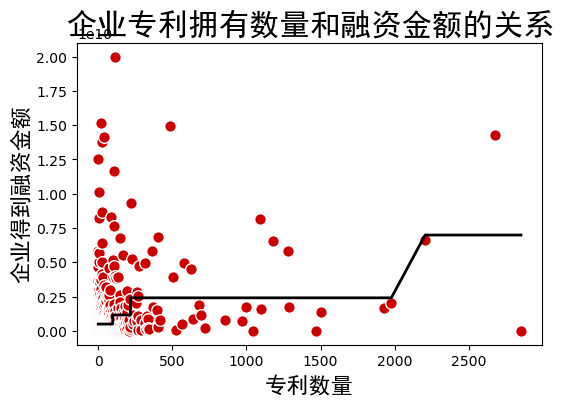

In [90]:
x= df_FinAmount_PatentB['Patent_Amount'].values
y= df_FinAmount_PatentB['Financing_Amount'].values
plt.rcParams['figure.dpi']=100
tree=DecisionTreeRegressor(max_depth=2)
tree.fit(x.reshape(-1,1),y)
sort_idx=x.flatten().argsort()

#绘制散点图
def lin_regplot(x,y,model):
    plt.scatter(x,y,c='#CC0000',edgecolor='white',s=70,label='Original')
    plt.plot(x,model.predict(x),color='black',lw=2,label='Decision Tree')
    return None

lin_regplot(x[sort_idx].reshape(-1,1),y[sort_idx],tree)
plt.title('企业专利拥有数量和融资金额的关系',fontproperties=my_font,fontsize=22)
plt.xlabel('专利数量',fontproperties=my_font,fontsize=16)
plt.ylabel('企业得到融资金额',fontproperties=my_font,fontsize=16)

plt.show()

..数据分析的尽头是统计学，而我统计学真的很差。